# Leopard challenge: Regression

## Загрузка данных
#### Данные беру из leopard-challenge-regression.zip

https://drive.google.com/file/d/19AlSgbp2_9mkLSaxrnVVQOicJ105V_B8/view?usp=sharing

# Colab

In [1]:
! gdown --id 19AlSgbp2_9mkLSaxrnVVQOicJ105V_B8

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


! unzip /content/leopard-challenge-regression.zip -d /content/leopard_challenge_regression/

In [9]:
! unzip / content / leopard-challenge-regression.zip -d / content / leopard_challenge_regression /

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [32]:
import pandas as pd

In [1]:
train = pd.read_csv('/content/leopard_challenge_regression/train.csv')

NameError: name 'pd' is not defined

In [1]:
train.head()

NameError: name 'train' is not defined

In [ ]:
!pip install phik

!pip install feature_engine

!pip install catboost

# Pycharm

In [1]:
from zipfile import ZipFile

with ZipFile('leopard-challenge-regression.zip', 'r') as zf:
    zf.extractall()

# 1. Задача

Даны данные о ценах на недвижимость в Мельбурне.
Каждая строчка в датасете - какой-то объект недвижимости, по которому известны некоторые его параметры и его цена.
**Задача:** по параметрам определить цену объекта.

# 2. Импорт библиотек

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import phik
import folium
from feature_engine.selection import SmartCorrelatedSelection
from feature_engine.imputation import RandomSampleImputer
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from catboost import CatBoostRegressor, Pool, cv
import joblib
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
import warnings
warnings.filterwarnings("ignore")

# plt.style.use('dark_background')
plt.style.use('seaborn-colorblind')
pd.set_option('display.max_columns', 100)

# 3. Загрузка Датасета

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,34302
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,33247
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,31886
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,NaN,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,18999
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,16809


In [4]:
df.shape

(18373, 22)

In [5]:
df_test = pd.read_csv('test.csv')

In [6]:
df_test.head()

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,id
0,Abbotsford,513/6 Acacia Pl,3,u,S,Dingle,7/10/2017,3.0,3067.0,NaN,NaN,NaN,NaN,NaN,NaN,Yarra City Council,NaN,NaN,Northern Metropolitan,4019.0,30130
1,Abbotsford,60 Charles St,3,h,S,Jellis,7/10/2017,3.0,3067.0,3.0,1.0,NaN,192.0,109.0,1900.0,Yarra City Council,-37.80792,144.99508,Northern Metropolitan,4019.0,18311
2,Abbotsford,38 Studley St,3,h,S,Nelson,7/10/2017,3.0,3067.0,3.0,1.0,1.0,159.0,93.0,1890.0,Yarra City Council,-37.80124,144.99459,Northern Metropolitan,4019.0,18934
3,Airport West,18 Glenys Av,3,h,S,Raine,7/10/2017,10.4,3042.0,3.0,1.0,5.0,536.0,108.0,1980.0,Moonee Valley City Council,-37.72285,144.87539,Western Metropolitan,3464.0,1824
4,Airport West,35 Thomas St,3,h,S,Nelson,7/10/2017,10.4,3042.0,3.0,1.0,1.0,NaN,130.0,2009.0,Moonee Valley City Council,-37.71754,144.87704,Western Metropolitan,3464.0,31339


In [7]:
df_test.shape

(8818, 21)

# 4. Получение информации о Датасете

## 4.1 Подготовка таблиц

#### Перевод названия колонок в строчные буквы

In [8]:
df.columns = df.columns.str.lower()
df_test.columns = df_test.columns.str.lower()

#### Перевод даты в datetime

In [9]:
df.date = pd.to_datetime(df.date, format='%d/%m/%Y')
df_test.date = pd.to_datetime(df_test.date, format='%d/%m/%Y')

## 4.2 Основная информация о датасете

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18373 entries, 0 to 18372
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   suburb         18373 non-null  object        
 1   address        18373 non-null  object        
 2   rooms          18373 non-null  int64         
 3   type           18373 non-null  object        
 4   price          18373 non-null  float64       
 5   method         18373 non-null  object        
 6   sellerg        18373 non-null  object        
 7   date           18373 non-null  datetime64[ns]
 8   distance       18373 non-null  float64       
 9   postcode       18373 non-null  float64       
 10  bedroom2       14905 non-null  float64       
 11  bathroom       14903 non-null  float64       
 12  car            14798 non-null  float64       
 13  landsize       13579 non-null  float64       
 14  buildingarea   7750 non-null   float64       
 15  yearbuilt      8944

**Обучающая таблица состоит из:** 18373 строк и 22 столбцов

In [11]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8818 entries, 0 to 8817
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   suburb         8818 non-null   object        
 1   address        8818 non-null   object        
 2   rooms          8818 non-null   int64         
 3   type           8818 non-null   object        
 4   method         8818 non-null   object        
 5   sellerg        8818 non-null   object        
 6   date           8818 non-null   datetime64[ns]
 7   distance       8817 non-null   float64       
 8   postcode       8817 non-null   float64       
 9   bedroom2       5858 non-null   float64       
 10  bathroom       5854 non-null   float64       
 11  car            5582 non-null   float64       
 12  landsize       4365 non-null   float64       
 13  buildingarea   2882 non-null   float64       
 14  yearbuilt      3112 non-null   float64       
 15  councilarea    8816 n

**Тестовая таблица состоит из:** 8818 строк и 21 столбца

## 4.3 Пропущенные значения

In [12]:
df.isna().mean().sort_values(ascending=False)

buildingarea     0.578185
yearbuilt        0.513199
landsize         0.260926
car              0.194579
bathroom         0.188864
bedroom2         0.188755
longtitude       0.181353
lattitude        0.181353
propertycount    0.000054
regionname       0.000054
councilarea      0.000054
suburb           0.000000
address          0.000000
postcode         0.000000
distance         0.000000
date             0.000000
sellerg          0.000000
method           0.000000
price            0.000000
type             0.000000
rooms            0.000000
id               0.000000
dtype: float64

In [13]:
df_test.isna().mean().sort_values(ascending=False)

buildingarea     0.673169
yearbuilt        0.647086
landsize         0.504990
car              0.366977
bathroom         0.336131
bedroom2         0.335677
longtitude       0.330007
lattitude        0.330007
propertycount    0.000227
regionname       0.000227
councilarea      0.000227
distance         0.000113
postcode         0.000113
suburb           0.000000
address          0.000000
date             0.000000
sellerg          0.000000
method           0.000000
type             0.000000
rooms            0.000000
id               0.000000
dtype: float64

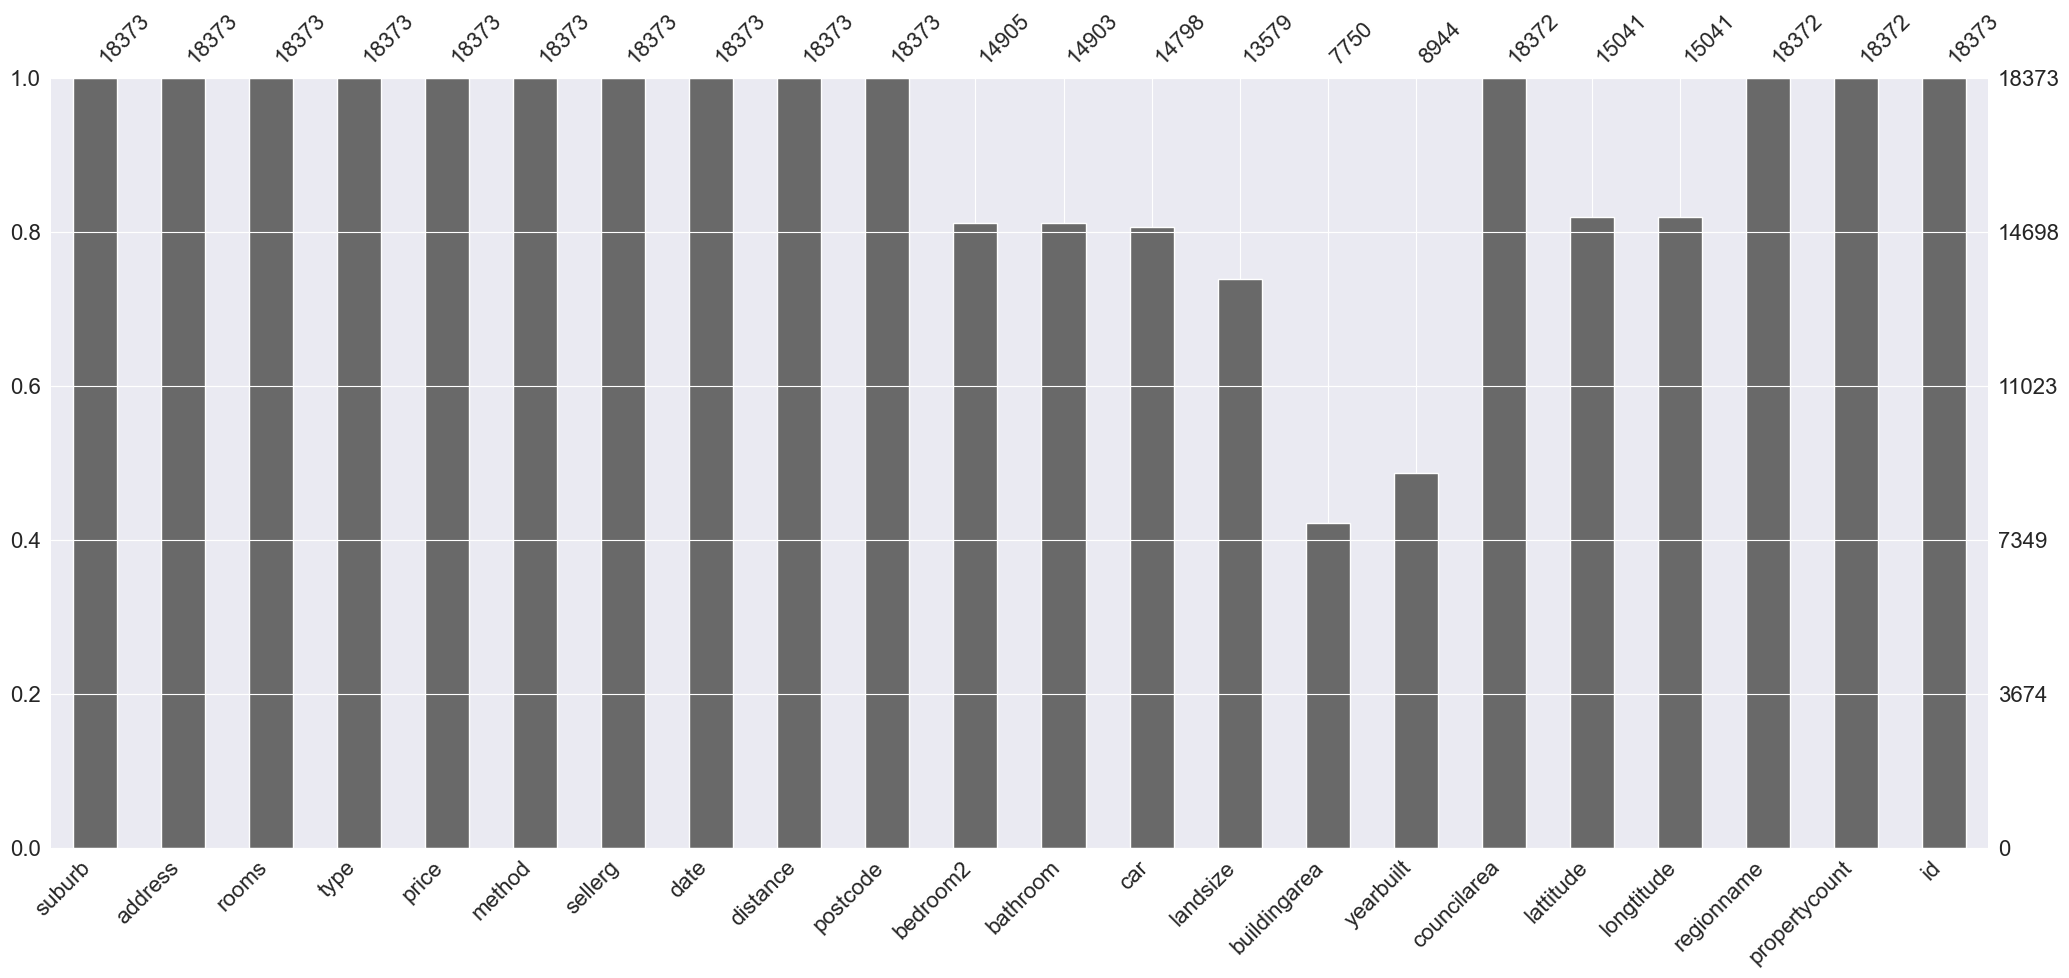

In [14]:
msno.bar(df);

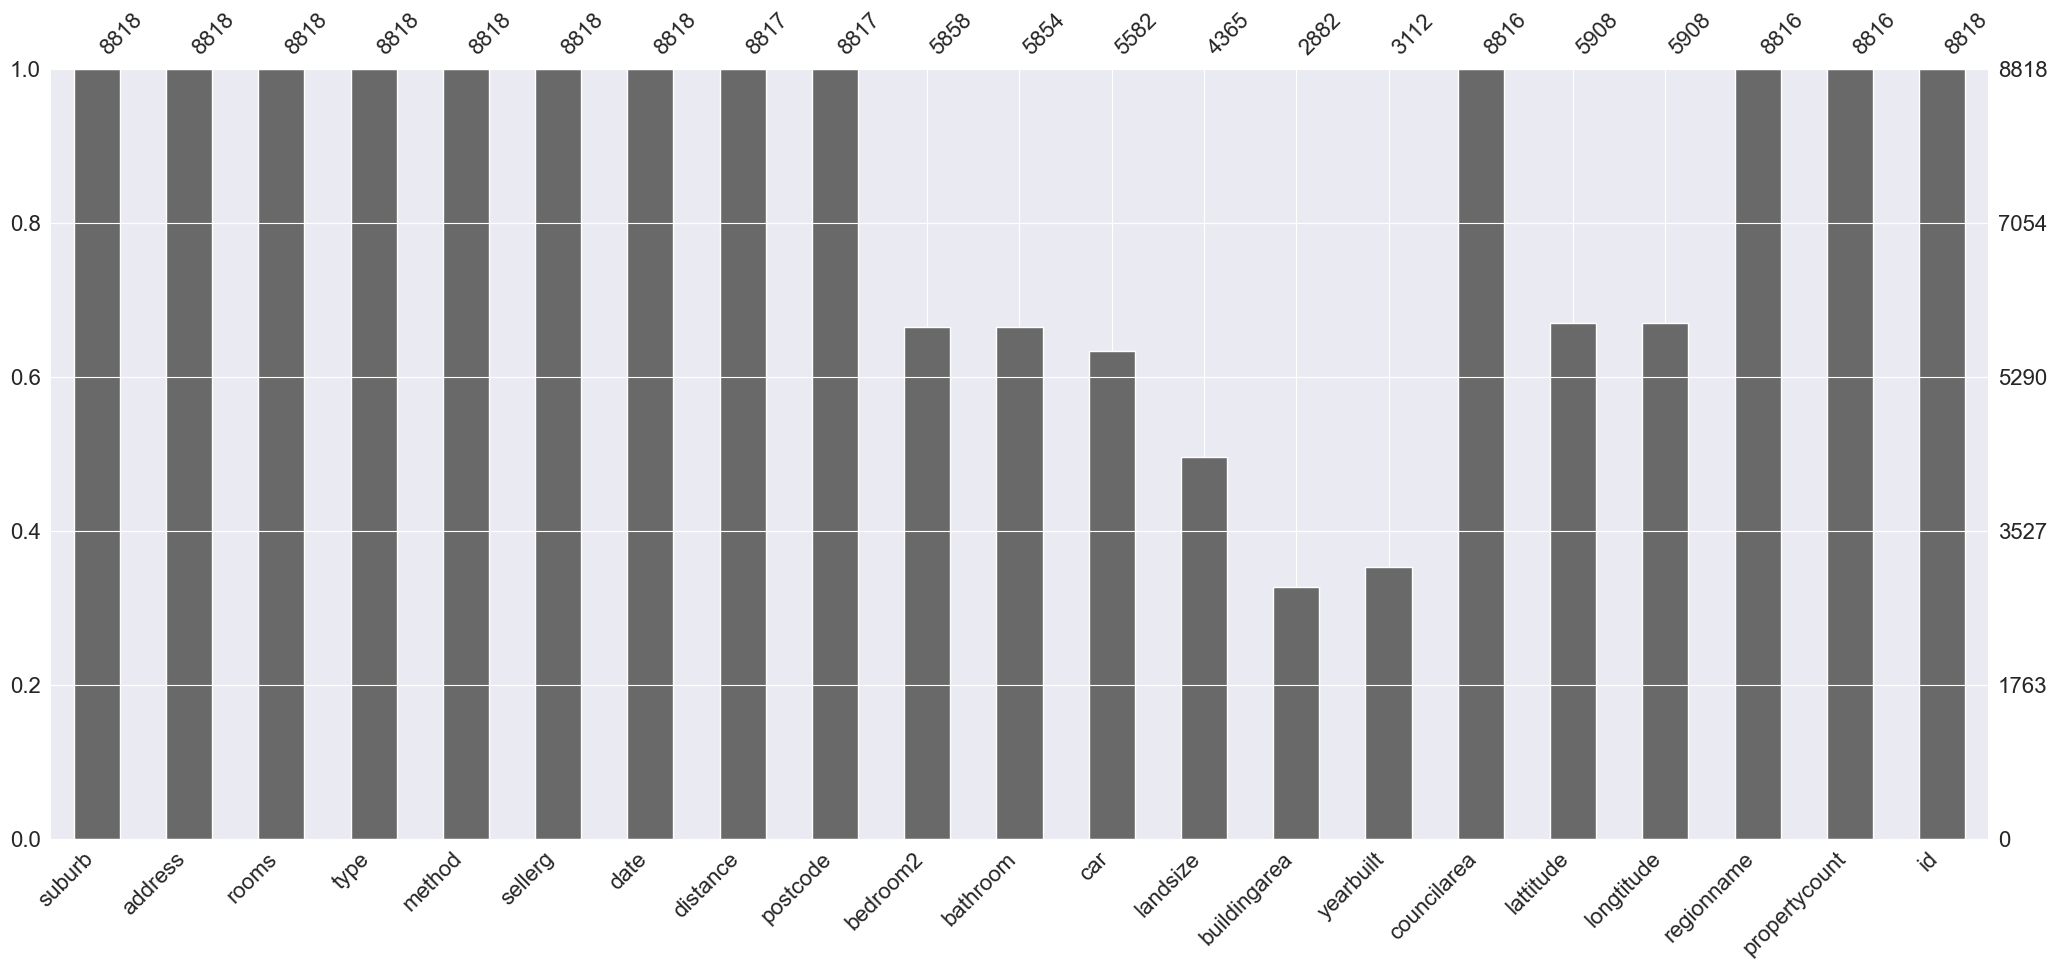

In [15]:
msno.bar(df_test);

**Пропущенные значения находятся в столбцах:** bedroom2, bathroom, car, landsize, buildingarea, yearbuilt, councilarea, lattitude, longtitude, regionname, propertycount.

## 4.4 Дубликаты

In [16]:
df.duplicated().sum()

0

In [17]:
df_test.duplicated().sum()

0

**Дубликаты отсутствуют!**

## 4.5 Числовые переменные

In [18]:
df.describe()

,rooms,price,distance,postcode,bedroom2,bathroom,car,landsize,buildingarea,yearbuilt,lattitude,longtitude,propertycount,id
count,18373.000000,1.837300e+04,18373.000000,18373.000000,14905.000000,14903.000000,14798.000000,13579.000000,7750.000000,8944.000000,15041.000000,15041.000000,18372.000000,18373.000000
mean,2.936592,1.053235e+06,10.403962,3107.258314,2.914928,1.538683,1.617313,558.937403,151.133167,1965.925089,-37.809872,144.996486,7518.621489,17490.731889
std,0.955952,6.217973e+05,6.018424,95.285542,0.962743,0.688374,0.957072,3991.516323,519.517626,36.958956,0.081272,0.106536,4487.143499,10075.864589
min,1.000000,2.270000e+05,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,144.431810,249.000000,2.000000
25%,2.000000,6.350000e+05,6.300000,3046.000000,2.000000,1.000000,1.000000,177.000000,93.000000,1950.000000,-37.858180,144.931400,4294.000000,8749.000000
50%,3.000000,8.800000e+05,9.700000,3085.000000,3.000000,1.000000,2.000000,440.000000,126.000000,1970.000000,-37.803600,145.001100,6567.000000,17497.000000
75%,3.000000,1.301000e+06,13.300000,3149.000000,3.000000,2.000000,2.000000,651.000000,173.862500,2000.000000,-37.756100,145.060190,10331.000000,26286.000000
max,12.000000,5.580000e+06,48.100000,3978.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,145.526350,21650.000000,34856.000000


#### Описание числовых переменных
**1.** Минимальная цена продажи - 227 000, Максимальная - 5 580 000, Средняя ≈ 1 053 000, Медианная ≈ 880 000
**2.** Минимальное количество комнат - 1, Максимальное - 12, Среднее и Медианное ≈ 3
**3. Квартиры располагаются в радиусе 48 км от центра:** Минимальное расстояние до центра - 0, Максимальное - 48км, Среднее и Медианное ≈ 10км
**4. Квартиры могут продаваться без спален:** Минимальное кол-во спален - 0, Максимальное - 20, Медианное и Среднее ≈ 3
**5. Квартиры могут продаваться без ванных:** Минимальное кол-во ванных - 0, Максимальное - 8, Среднее - 1.5, Медианное - 1
**6. Квартиры могут продаваться без парковочных мест:** Минимальное кол-во парковок - 0, Максимальное - 10, Среднее - 1.6, Медианное - 2
**7. Объекты могут продаваться без прилегающей территории:** Минимальная прилегающая территория - 0, Максимальная - 433014 м² (**ВЫБРОС!**), Средняя - 558 м², Медианная - 440 м²
**8.** Минимальная жилая площадь - 0 (Возможно студии???), Максимальная ≈ 44000 м² (**ВЫБРОС!!**), Средняя - 151 м², Медианная - 126м
**9.** Минимальный год постройки - 1196 (**ВЫБРОС!!!**), Максимальный - 2018, Средний - 1966, Медианный - 1970

## 4.6 Категориальные переменные

In [19]:
df.describe(include='object').T

,count,unique,top,freq
suburb,18373,329,Reservoir,540
address,18373,18112,28 Blair St,3
type,18373,3,h,12091
method,18373,5,S,12025
sellerg,18373,305,Nelson,2001
councilarea,18372,33,Boroondara City Council,1896
regionname,18372,8,Southern Metropolitan,6326


#### Описание категориальных переменных
**1.** Чаще всего продаются объекты типа h: коттеджи, виллы, дома и т.д.
**2.** Больше всего объектов продаётся в районе Reservoir - 540
**3.** Больше всего объектов продаётся в округе Boroondara City - 1896
**4.** Больше всего объектов продаётся в Административном округе Southern Metropolitan - 6326

# 5. EDA

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18373 entries, 0 to 18372
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   suburb         18373 non-null  object        
 1   address        18373 non-null  object        
 2   rooms          18373 non-null  int64         
 3   type           18373 non-null  object        
 4   price          18373 non-null  float64       
 5   method         18373 non-null  object        
 6   sellerg        18373 non-null  object        
 7   date           18373 non-null  datetime64[ns]
 8   distance       18373 non-null  float64       
 9   postcode       18373 non-null  float64       
 10  bedroom2       14905 non-null  float64       
 11  bathroom       14903 non-null  float64       
 12  car            14798 non-null  float64       
 13  landsize       13579 non-null  float64       
 14  buildingarea   7750 non-null   float64       
 15  yearbuilt      8944

**Построю *scatterplot* для просмотра распределения объектов недвижимости по координатам**

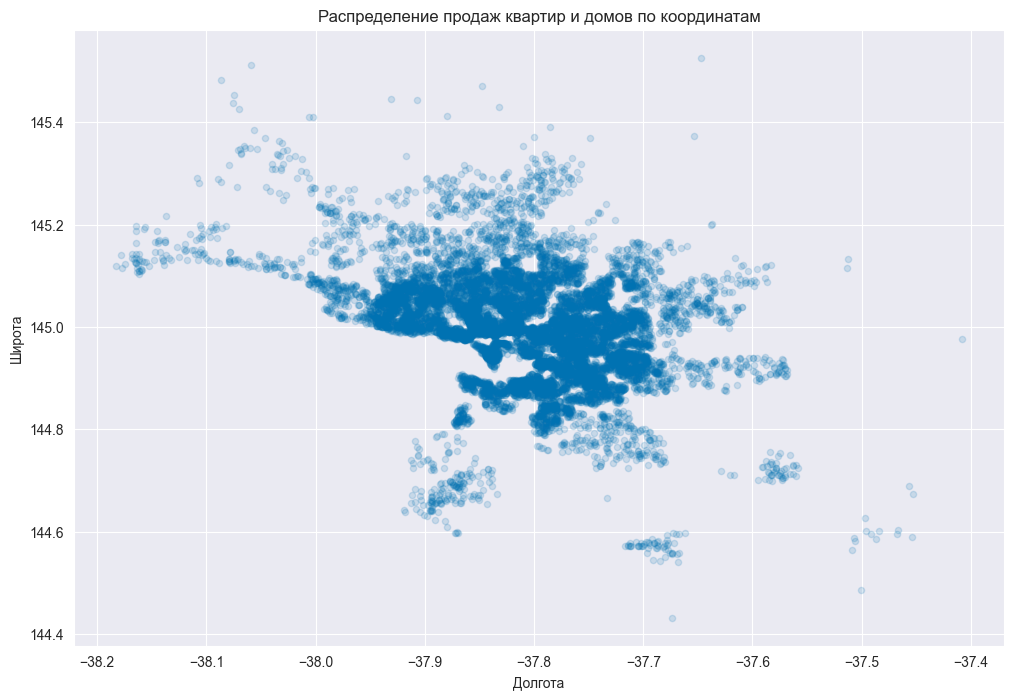

In [21]:
df.plot(kind='scatter', x='lattitude', y='longtitude', alpha=0.15, figsize=(12,8))
plt.title('Распределение продаж квартир и домов по координатам')
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


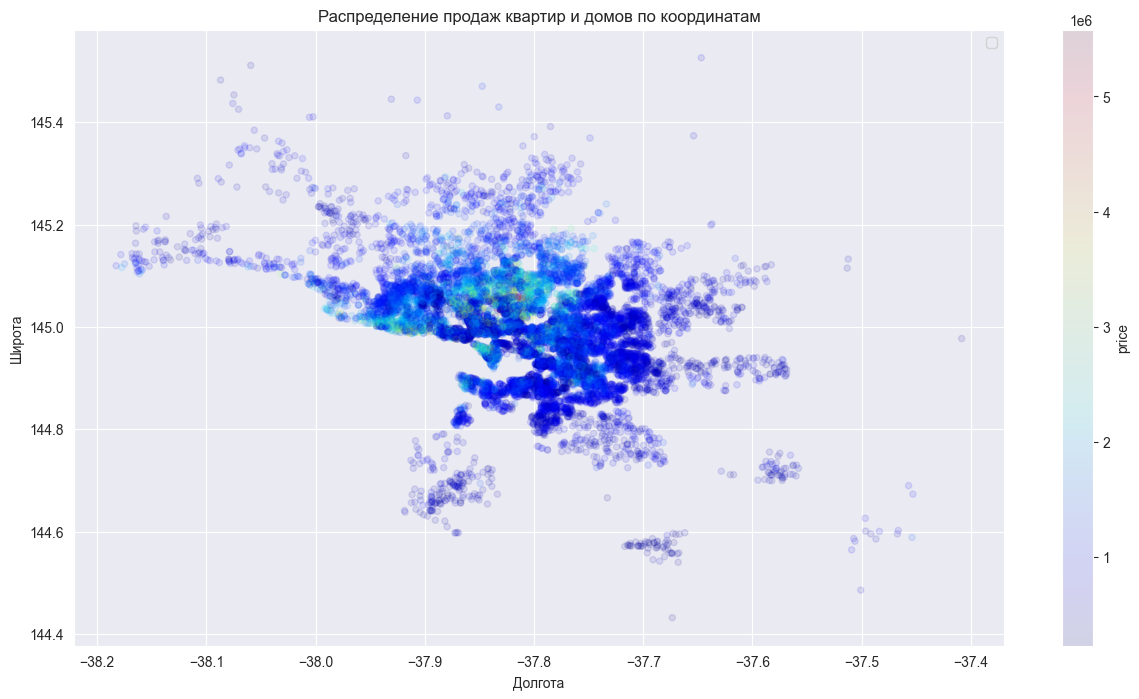

In [22]:
df.plot(kind='scatter', x='lattitude', y='longtitude', alpha=0.1, figsize=(15,8),
       c='price', cmap=plt.get_cmap('jet'), colorbar=True)
plt.legend()
plt.title('Распределение продаж квартир и домов по координатам')
plt.xlabel("Долгота")
plt.ylabel("Широта")
plt.show()

## 5.1 Корреляция признаков

In [10]:
corr_matrix = df.corr()
corr_matrix['price'].sort_values(ascending=False)

ValueError: could not convert string to float: 'Abbotsford'

Посмотрим на признаки, которые больше всего коррелируют с ценой

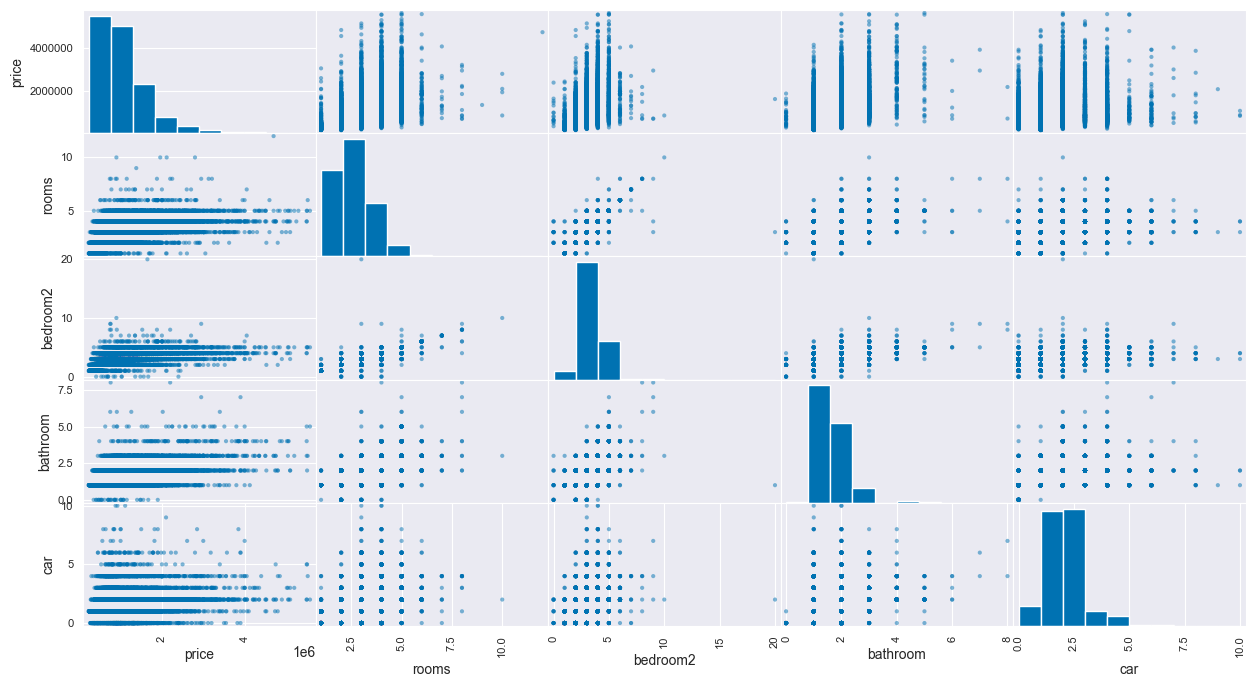

In [24]:
attributes = ['price', 'rooms', 'bedroom2', 'bathroom', 'car']
pd.plotting.scatter_matrix(df[attributes], figsize=(15,8))
plt.show()

Можно заметить зависимость количества спален от количества комнат.
Рассмотрим этот атрибут более подробно

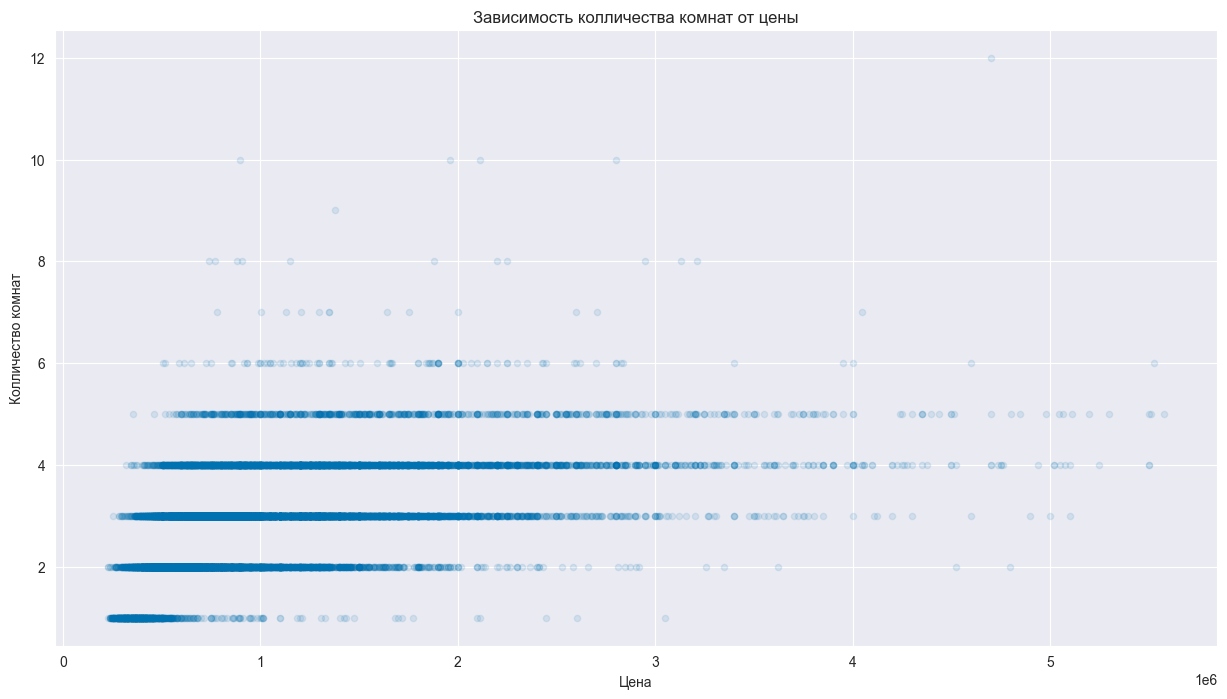

In [25]:
df.plot(kind='scatter', x='price', y='rooms', alpha=0.1, figsize=(15,8))
plt.title('Зависимость колличества комнат от цены')
plt.xlabel("Цена")
plt.ylabel("Колличество комнат")
plt.show()

Оценю зависимости на графике heatmap

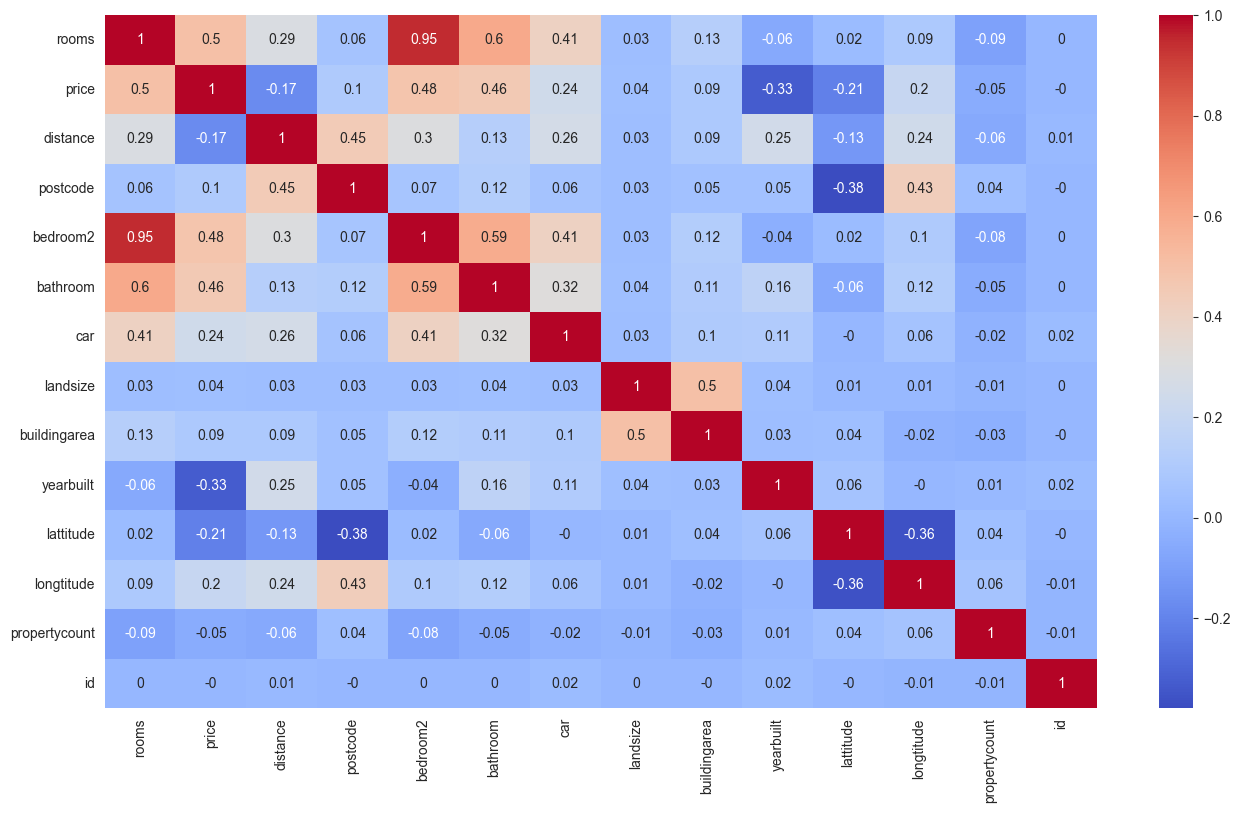

In [26]:
plt.figure(figsize=(16,9))
sns.heatmap(round(df.corr(),2),annot=True,cmap="coolwarm")
plt.show()

Проверка на корреляцию

In [27]:
correlated = SmartCorrelatedSelection(
    variables= None,
    method = 'pearson',
    threshold = 0.8,
    missing_values = 'ignore',
    selection_method = 'variance',
    estimator=None,
    scoring = 'roc_auc',
    cv=5)

correlated.fit(df)

SmartCorrelatedSelection(cv=5, selection_method='variance')

SmartCorrelatedSelection - рекомендует выкинуть столбец ROOMS для меньшей корреляции с другими столбцами.

In [28]:
correlated.features_to_drop_

['rooms']

## 5.2 Phik взаимосвязь

In [29]:
# Часть от Phik
# df_exp = df.sample(frac=0.2, random_state=42)
# phik_overview = df_exp.phik_matrix()
# phik_overview['price'].round(2).sort_values(ascending=False)

# Phik полностью
# phik_overview = train.phik_matrix()  # 21 минута в colab, 10 минут пк
# phik_overview['price'].round(2).sort_values(ascending=False)

## 5.3 Количественные признаки

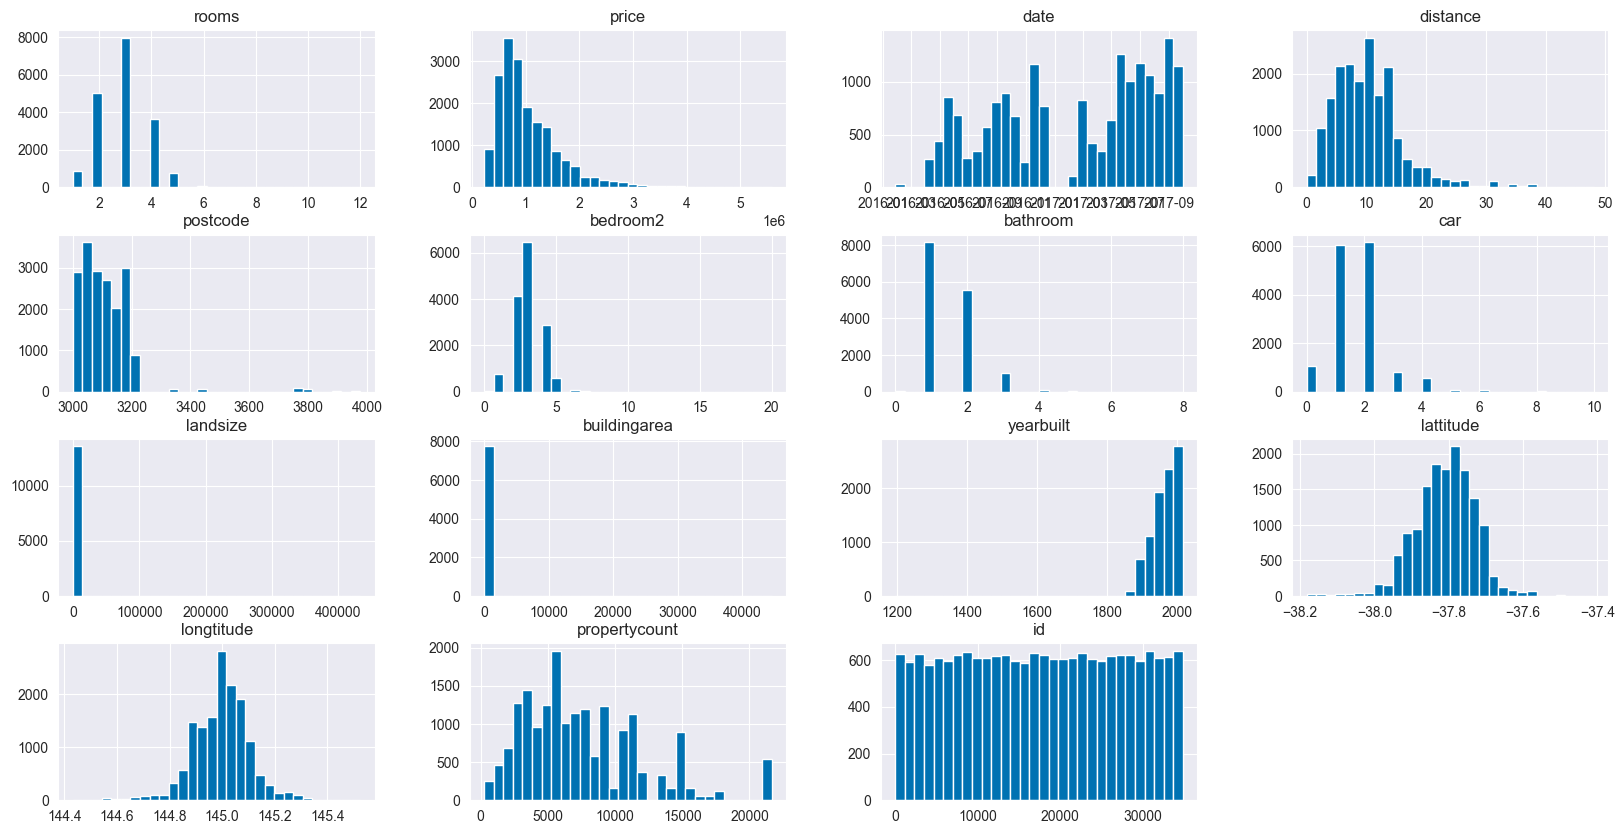

In [30]:
df.hist(figsize = (20, 10), bins = 30, legend = False)
plt.show()

#### Функция гистограммы и описания для количественных признаков

In [31]:
def hist_box_describe_num(ds, x):
    print(ds[x].describe())
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    sns.histplot(data=ds, x=ds[x], kde=True);
    plt.subplot(1,2,2)
    sns.boxplot(data=ds, y=ds[x]);

### Price - Распределение цены

count    1.837300e+04
mean     1.053235e+06
std      6.217973e+05
min      2.270000e+05
25%      6.350000e+05
50%      8.800000e+05
75%      1.301000e+06
max      5.580000e+06
Name: price, dtype: float64


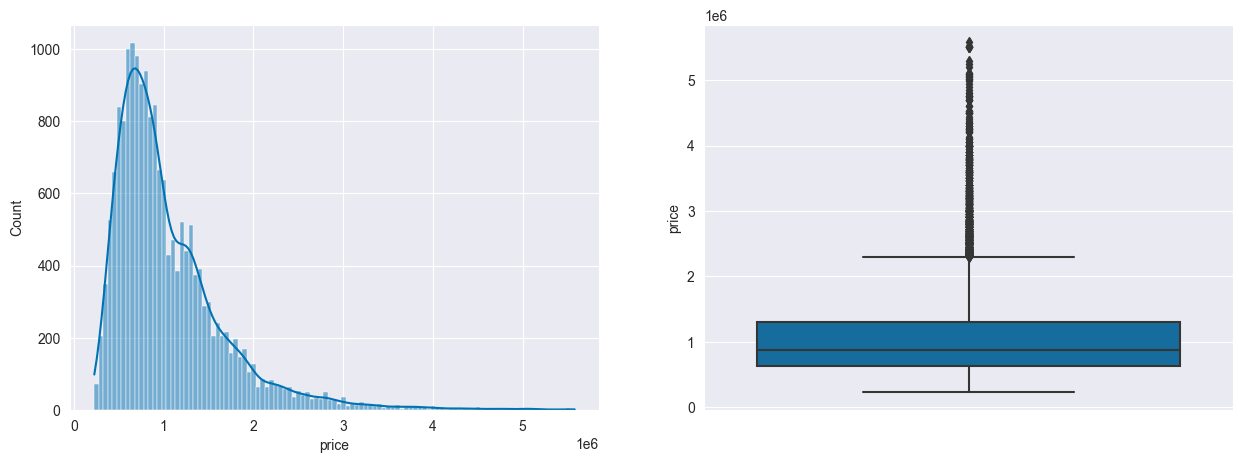

In [32]:
hist_box_describe_num(df, 'price')

Большинство домов оцениваются от 200.000 до 2.2 млн.
Половина всех объектов оценивается от 600 тыс до 1.3 млн

### Rooms - Количество комнат

count    18373.000000
mean         2.936592
std          0.955952
min          1.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         12.000000
Name: rooms, dtype: float64


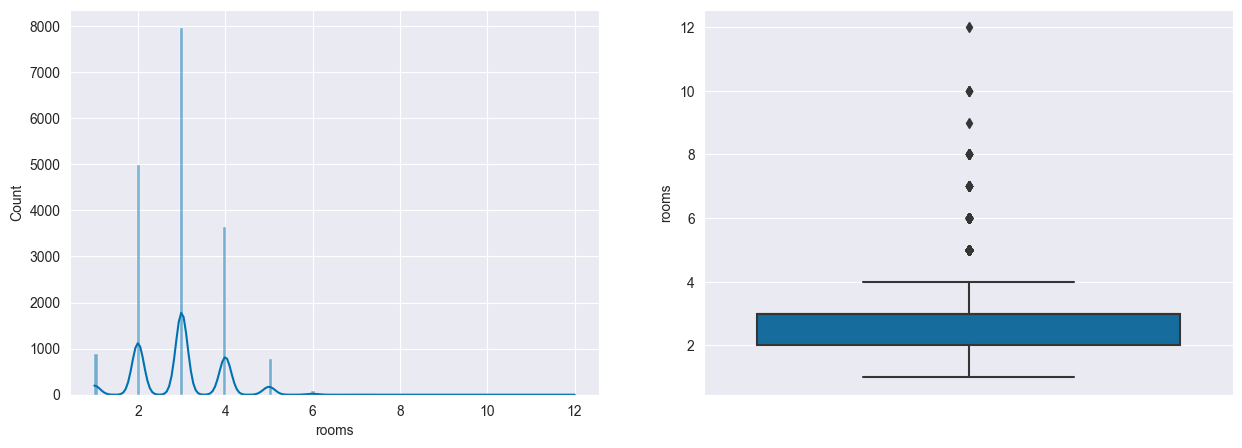

In [33]:
hist_box_describe_num(df, 'rooms')

Большинство домов имеют от 1 до 4 комнат, а в половине объектов от 2 до 3

### Distance - Расстояние до центра

count    18373.000000
mean        10.403962
std          6.018424
min          0.000000
25%          6.300000
50%          9.700000
75%         13.300000
max         48.100000
Name: distance, dtype: float64


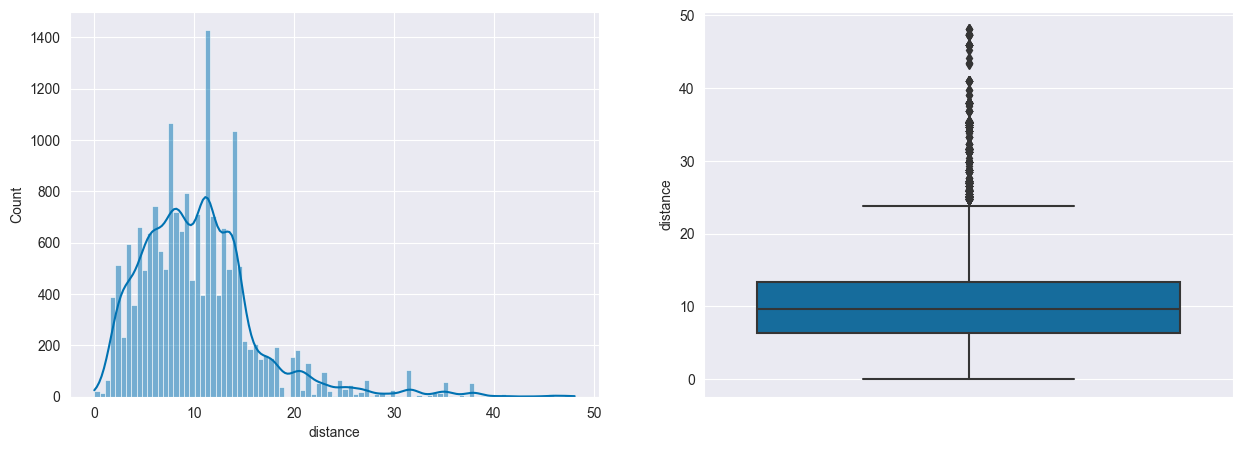

In [34]:
hist_box_describe_num(df, 'distance')

Большинство домов находятся от 0 до 24 км от центра
Получаем, что половина живёт от 6 до 13 км от центра

### Postcode - Почтовый индекс

count    18373.000000
mean      3107.258314
std         95.285542
min       3000.000000
25%       3046.000000
50%       3085.000000
75%       3149.000000
max       3978.000000
Name: postcode, dtype: float64


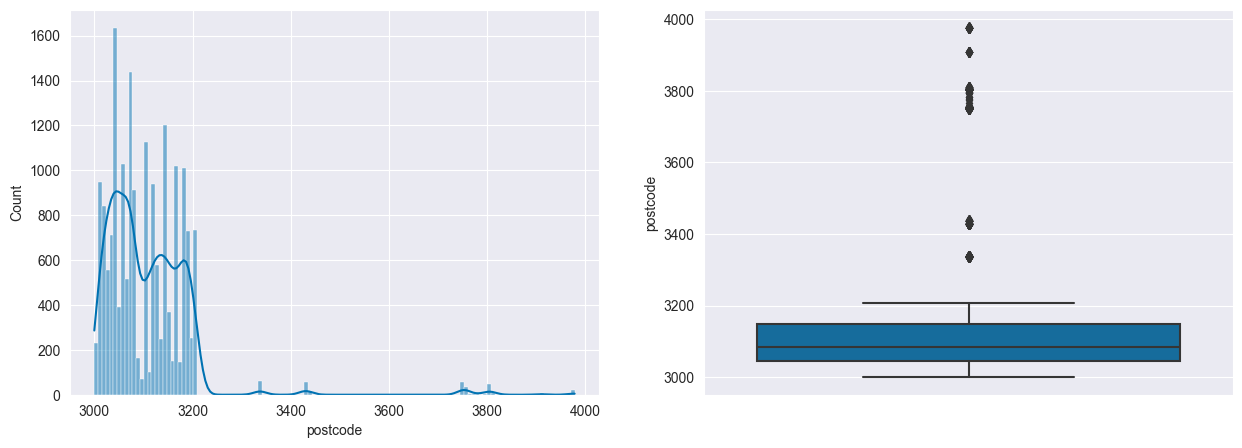

In [35]:
hist_box_describe_num(df, 'postcode')

Большинство почтовых индексов находятся от 3000 до 3200-ого

### Bedroom2 - Количество спален

count    14905.000000
mean         2.914928
std          0.962743
min          0.000000
25%          2.000000
50%          3.000000
75%          3.000000
max         20.000000
Name: bedroom2, dtype: float64


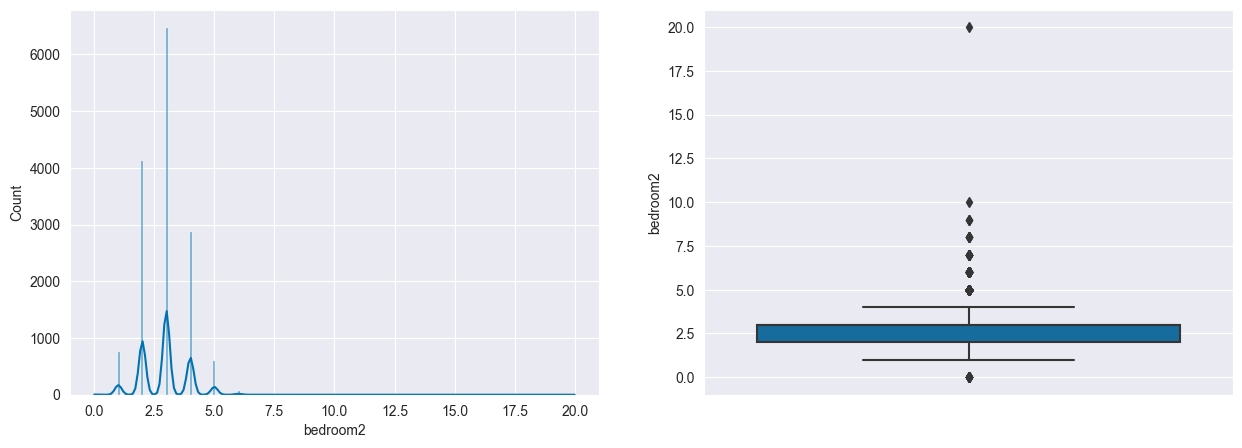

In [36]:
hist_box_describe_num(df, 'bedroom2')

В большинстве домов от 1 до 4 спален

### Bathroom - Количество ванных комнат

count    14903.000000
mean         1.538683
std          0.688374
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          8.000000
Name: bathroom, dtype: float64


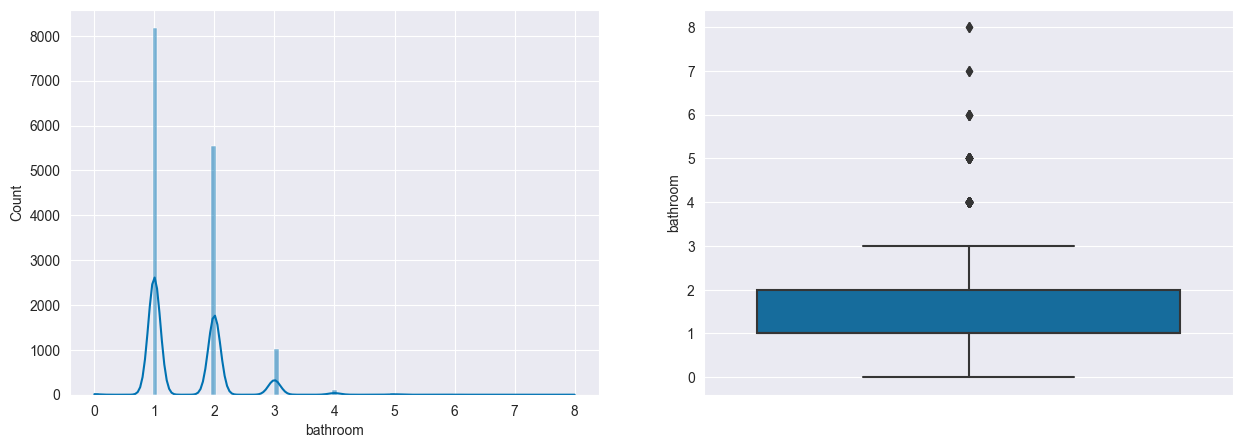

In [37]:
hist_box_describe_num(df, 'bathroom')

Большинство домов имеет от 0 до 3 ванных комнат

### Car - Количество парковочных мест:

count    14798.000000
mean         1.617313
std          0.957072
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max         10.000000
Name: car, dtype: float64


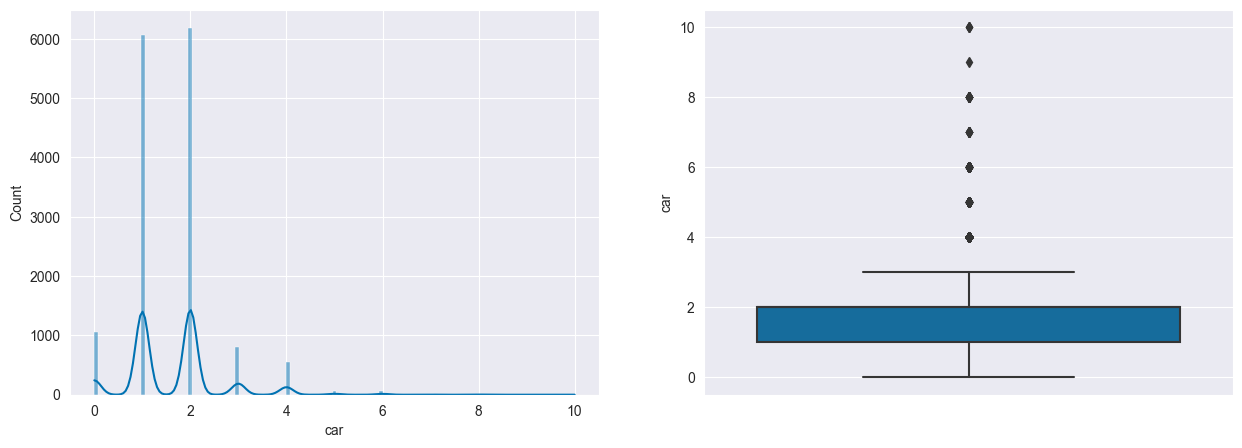

In [38]:
hist_box_describe_num(df, 'car')

**В большинстве домов от 0 до 3 парковочных мест**

### Landsize - Площадь прилегающей территории

count     13579.000000
mean        558.937403
std        3991.516323
min           0.000000
25%         177.000000
50%         440.000000
75%         651.000000
max      433014.000000
Name: landsize, dtype: float64


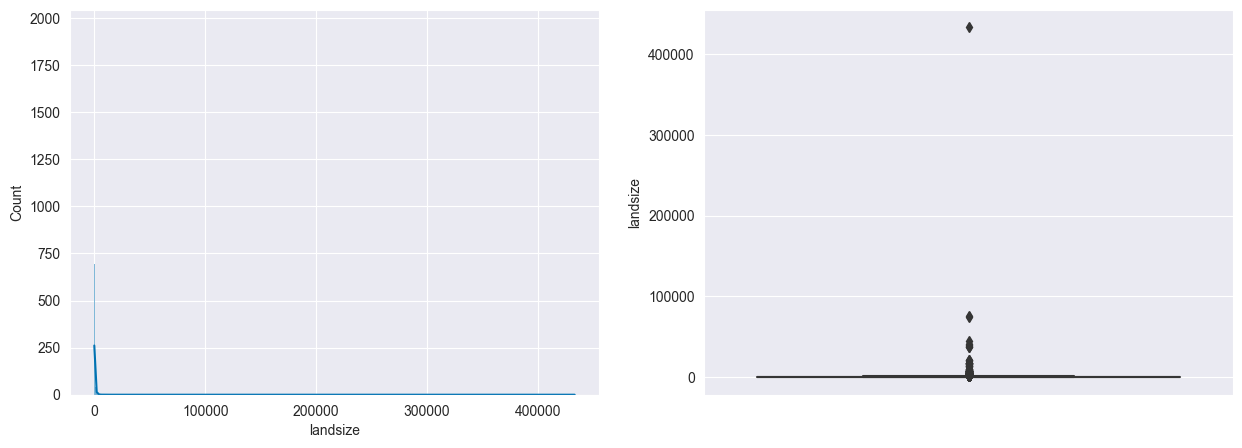

In [39]:
hist_box_describe_num(df, 'landsize')

Есть выбросы
Можно считать выбросами объекты, где прилегающая территория больше 1750. Таких объектов 277, что около 2%.
Посмотрю распределение прилегающей территории без выбросов

count    13301.000000
mean       422.445380
std        301.055625
min          0.000000
25%        172.000000
50%        422.000000
75%        645.000000
max       1730.000000
Name: landsize, dtype: float64


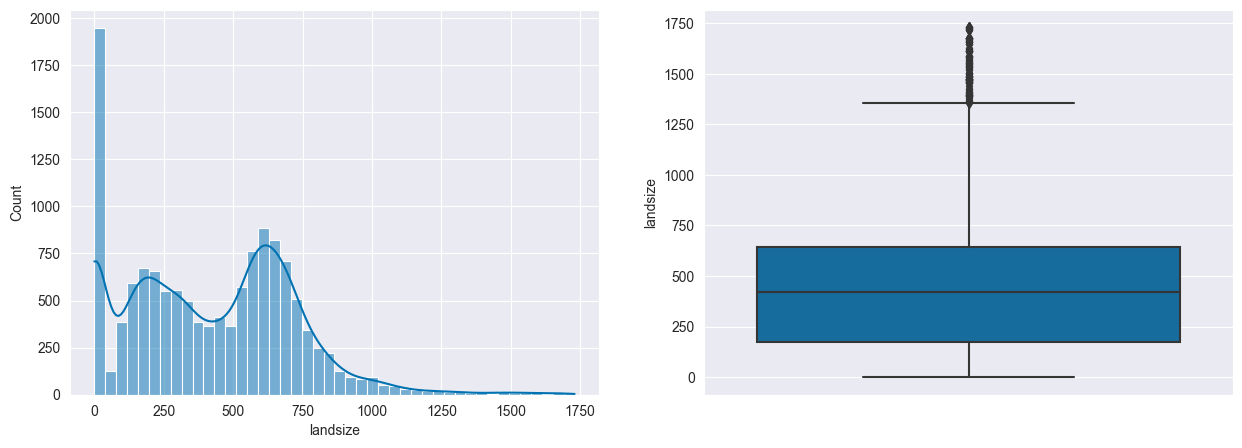

In [40]:
hist_box_describe_num(df.query('landsize < 1750'), 'landsize')

Существует множество домов без прилегающей территории, а так же большинство домов имеет прилегающую территорию от 0 до 1350 м²

### BuildingArea - Площадь дома

count     7750.000000
mean       151.133167
std        519.517626
min          0.000000
25%         93.000000
50%        126.000000
75%        173.862500
max      44515.000000
Name: buildingarea, dtype: float64


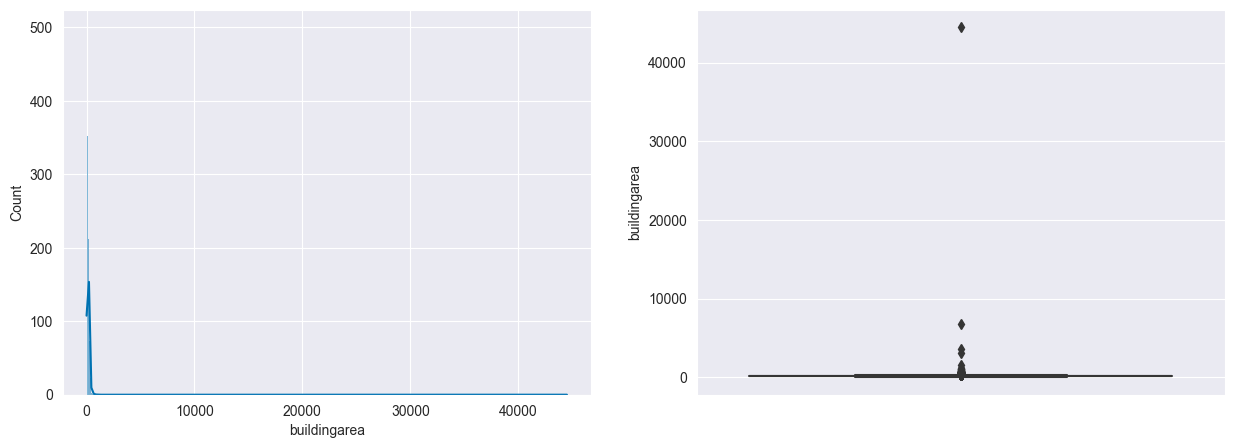

In [41]:
hist_box_describe_num(df, 'buildingarea')

Есть выбросы
Можно считать выбросами объекты, где площадь дома более 600 м². Таких объектов ≈0.5%

count    7713.000000
mean      141.001453
std        75.294717
min         0.000000
25%        92.000000
50%       125.000000
75%       172.000000
max       594.000000
Name: buildingarea, dtype: float64


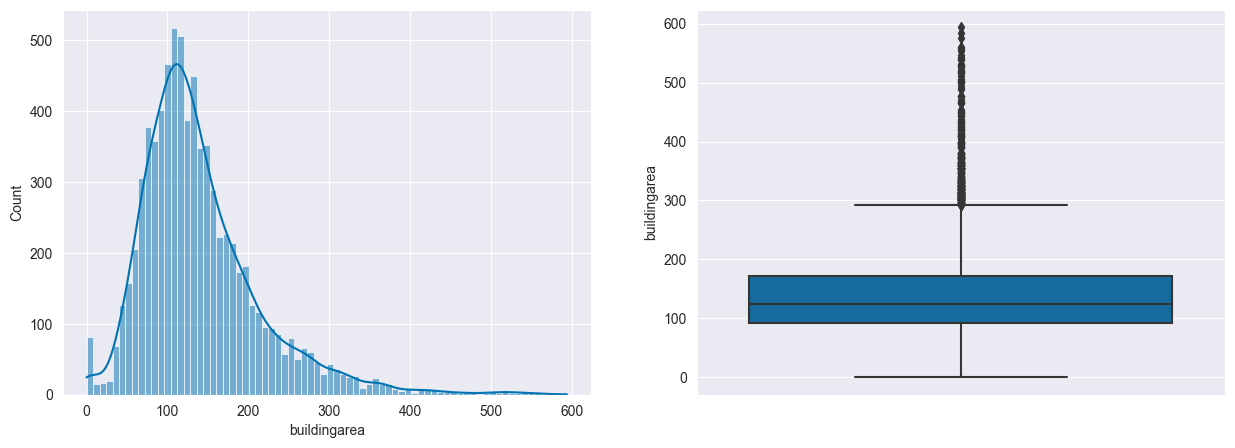

In [42]:
hist_box_describe_num(df.query('buildingarea < 600'), 'buildingarea')

Большинство домов имеют площадь от 0 до 300 м²

### YearBuilt - Год постройки

count    8944.000000
mean     1965.925089
std        36.958956
min      1196.000000
25%      1950.000000
50%      1970.000000
75%      2000.000000
max      2018.000000
Name: yearbuilt, dtype: float64


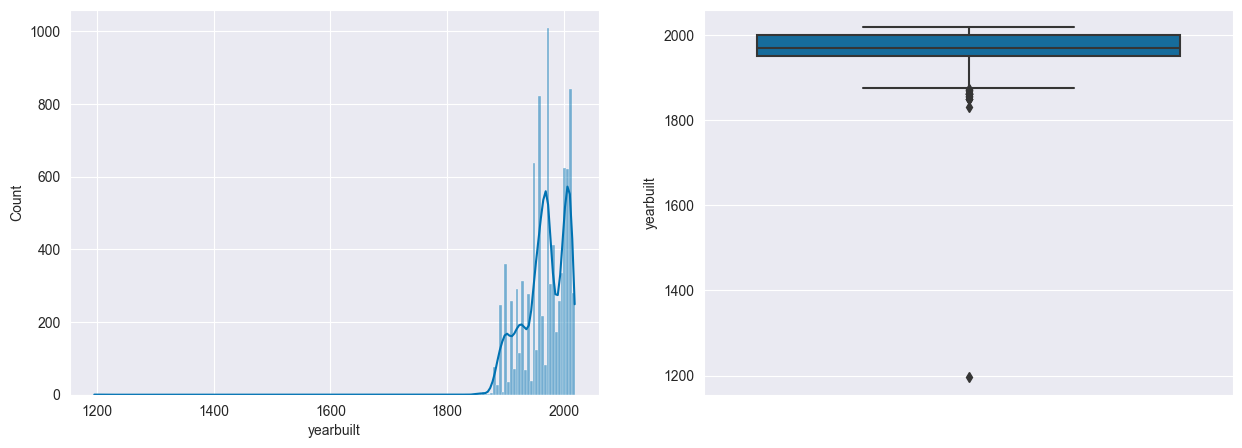

In [43]:
hist_box_describe_num(df, 'yearbuilt')

Есть выбросы
Можно считать выбросами объекты, год постройки которых старше 1875. Таких объектов ≈0.2%

count    8921.000000
mean     1966.271494
std        35.709928
min      1877.000000
25%      1950.000000
50%      1970.000000
75%      2000.000000
max      2018.000000
Name: yearbuilt, dtype: float64


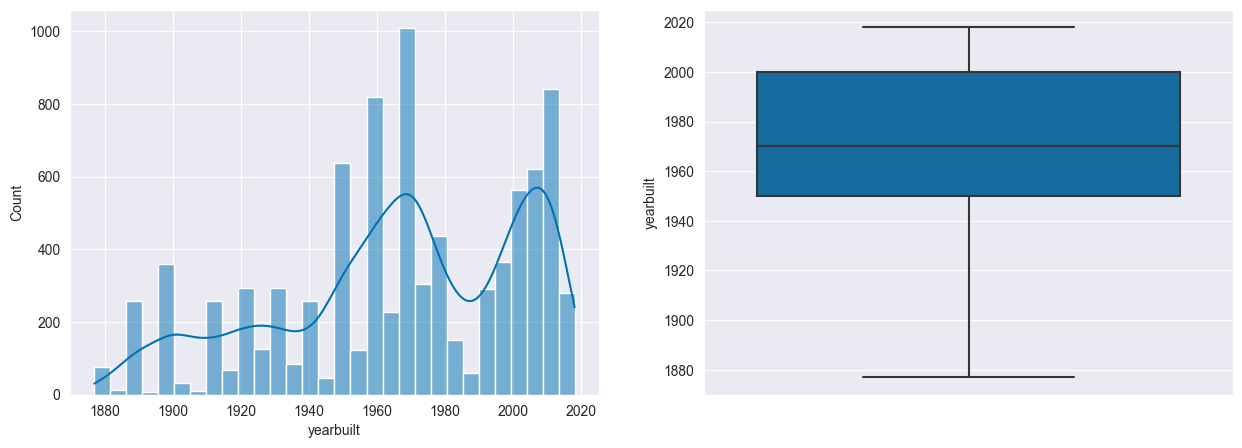

In [44]:
hist_box_describe_num(df.query('yearbuilt > 1875'), 'yearbuilt')

Большинство домов построены в период с 1950 по 2000 годы

### Lattitude - Широта

count    15041.000000
mean       -37.809872
std          0.081272
min        -38.182550
25%        -37.858180
50%        -37.803600
75%        -37.756100
max        -37.408530
Name: lattitude, dtype: float64


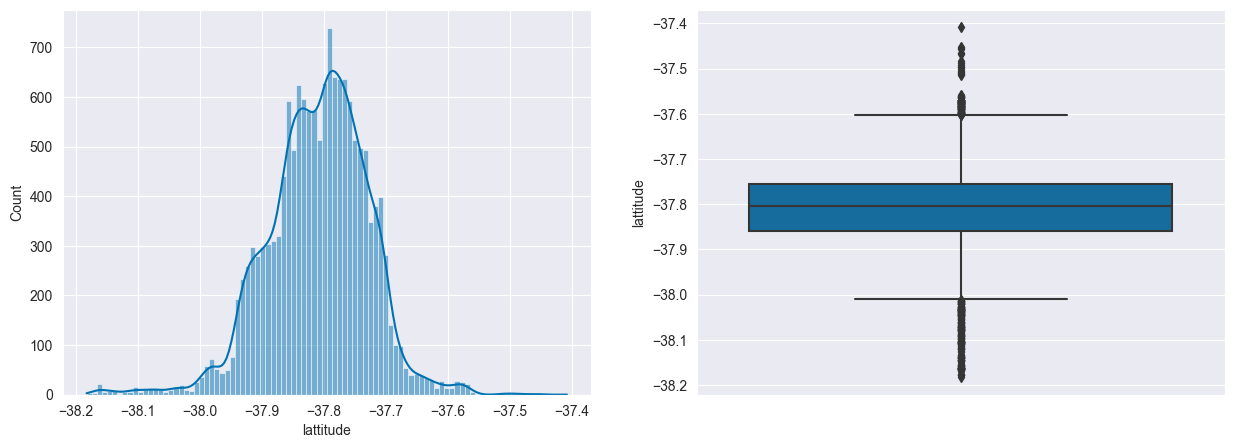

In [45]:
hist_box_describe_num(df, 'lattitude')

Дома чаще всего находятся между -38 и -37.6 широтой

### Longtitude - Долгота

count    15041.000000
mean       144.996486
std          0.106536
min        144.431810
25%        144.931400
50%        145.001100
75%        145.060190
max        145.526350
Name: longtitude, dtype: float64


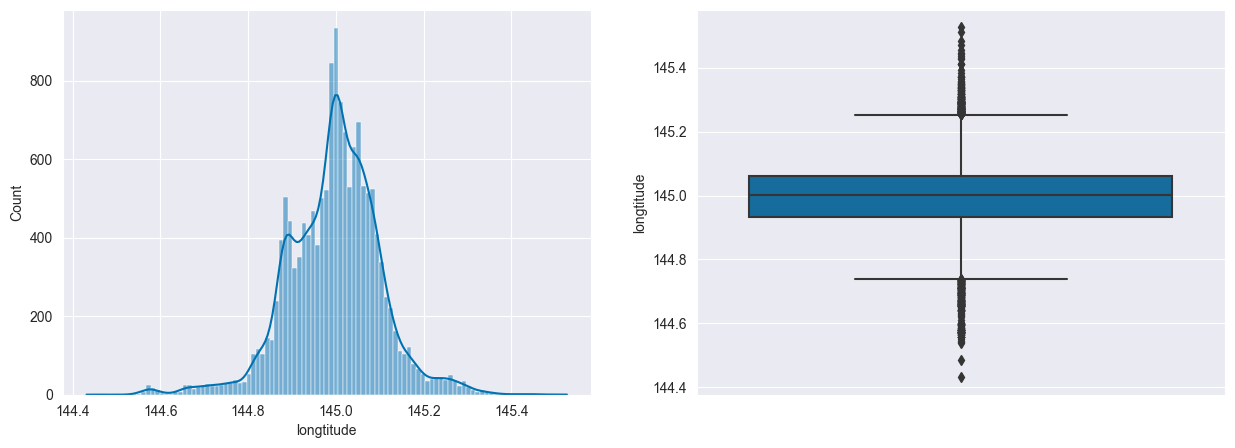

In [46]:
hist_box_describe_num(df, 'longtitude')

Большинство домов между 144.7 и 145.3 долготой

### Propertycount - Количество объектов недвижимости в одном районе

count    18372.000000
mean      7518.621489
std       4487.143499
min        249.000000
25%       4294.000000
50%       6567.000000
75%      10331.000000
max      21650.000000
Name: propertycount, dtype: float64


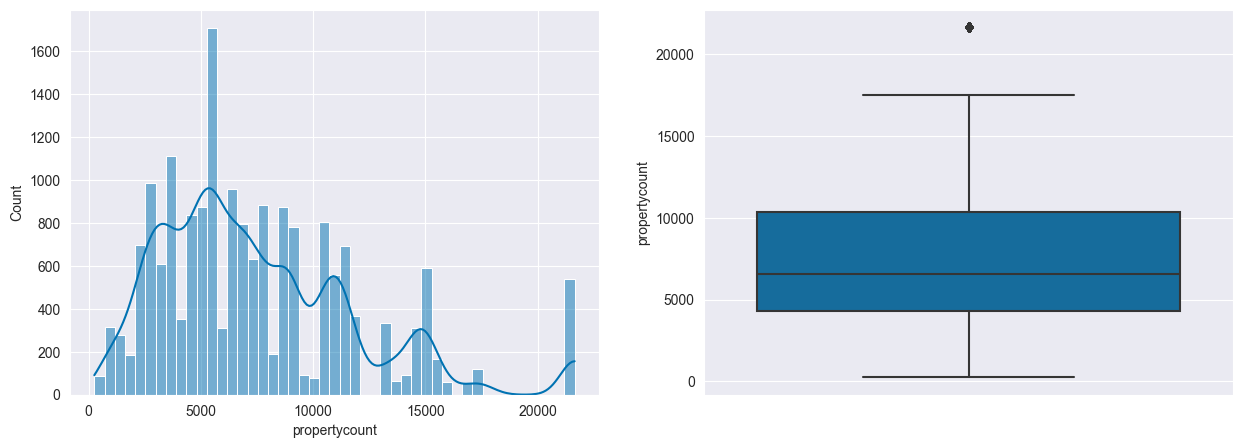

In [47]:
hist_box_describe_num(df, 'propertycount')

В одном районе может быть от 249 до 17 тысяч объектов недвижимости

### id

count    18373.000000
mean     17490.731889
std      10075.864589
min          2.000000
25%       8749.000000
50%      17497.000000
75%      26286.000000
max      34856.000000
Name: id, dtype: float64


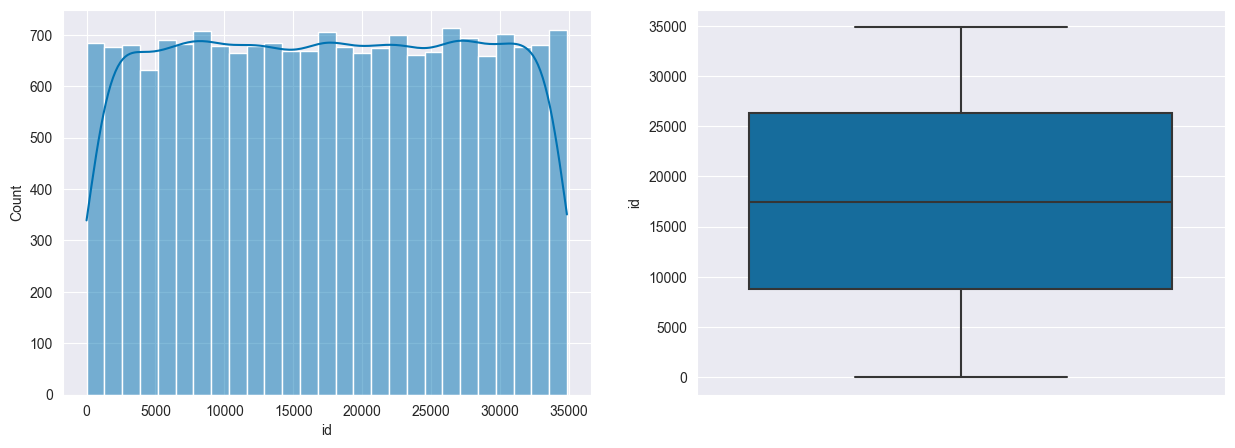

In [48]:
hist_box_describe_num(df, 'id')

id расположены равномерно от 2 до ≈35000

## 5.4 Категориальные признаки

In [49]:
df.describe(include='object').T

,count,unique,top,freq
suburb,18373,329,Reservoir,540
address,18373,18112,28 Blair St,3
type,18373,3,h,12091
method,18373,5,S,12025
sellerg,18373,305,Nelson,2001
councilarea,18372,33,Boroondara City Council,1896
regionname,18372,8,Southern Metropolitan,6326


#### Функция для категориальных признаков

In [50]:
def describe_cat(ds, x):
    print('Number of unique values:', ds[x].nunique())
    print(ds[x].value_counts())

#### Suburb - Район (микрорайон)

In [51]:
describe_cat(df, 'suburb')

Number of unique values: 329
Reservoir         540
Bentleigh East    368
Richmond          333
Preston           312
Brunswick         285
                 ... 
Wonga Park          1
Upwey               1
Bacchus Marsh       1
Rockbank            1
Monbulk             1
Name: suburb, Length: 329, dtype: int64


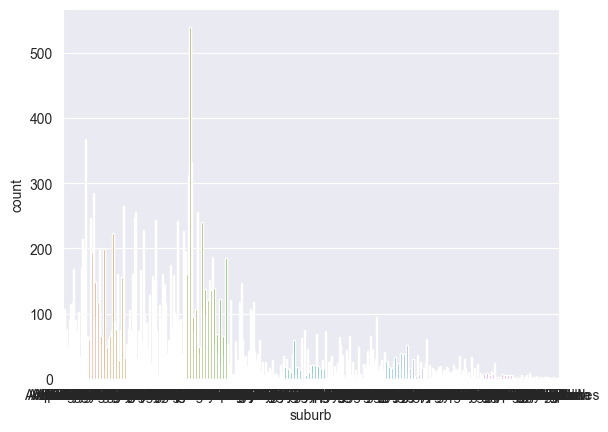

In [52]:
sns.countplot(data=df, x='suburb');

Т.к. районов более 300, сложно их обобщить

Топ 5 дорогих микрорайонов:

In [53]:
df.groupby('suburb').price.median().sort_values(ascending=False).head()

suburb
Canterbury     1992500.0
Albert Park    1875000.0
Middle Park    1850000.0
Camberwell     1845000.0
Balwyn         1800000.0
Name: price, dtype: float64

Топ 5 дешёвых микрорайонов:

In [54]:
df.groupby('suburb').price.median().sort_values().head()

suburb
Bacchus Marsh     285000.0
Rockbank          340000.0
Kurunjang         353500.0
Werribee South    355000.0
Wallan            366000.0
Name: price, dtype: float64

### Type - Тип дома

In [55]:
describe_cat(df, 'type')

Number of unique values: 3
h    12091
u     4275
t     2007
Name: type, dtype: int64


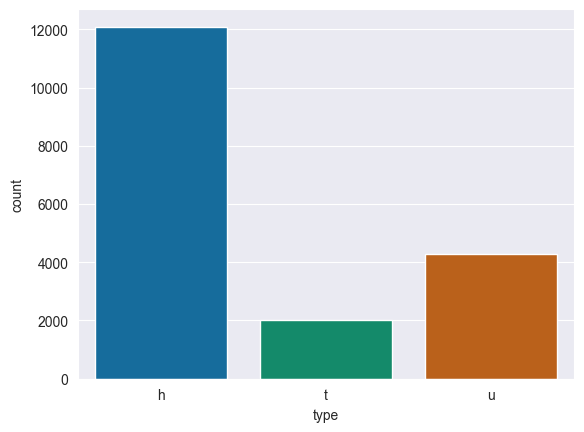

In [56]:
sns.countplot(data=df, x='type');

Больше всего домов типа h - дома, виллы, коттеджи. В середине u - дуплексы. Меньше всего t - таунхаусы.

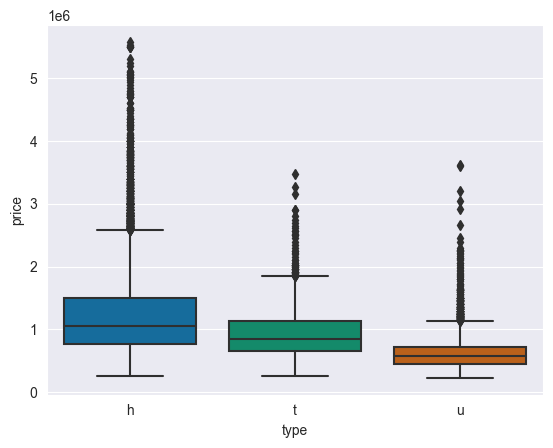

In [57]:
sns.boxplot(data=df, x='type', y='price');

Самые дорогие - h (коттеджи), дешевле - t (таунхаусы), самые дешёвые - u (дуплексы)

### Method - метод продажи

In [58]:
describe_cat(df, 'method')

Number of unique values: 5
S     12025
SP     2353
PI     2179
VB     1688
SA      128
Name: method, dtype: int64


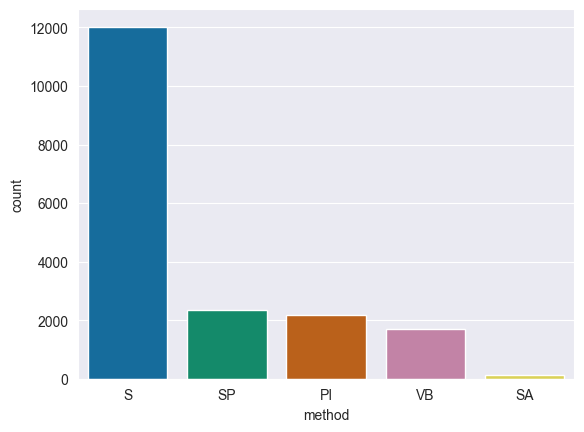

In [59]:
sns.countplot(data=df, x='method');

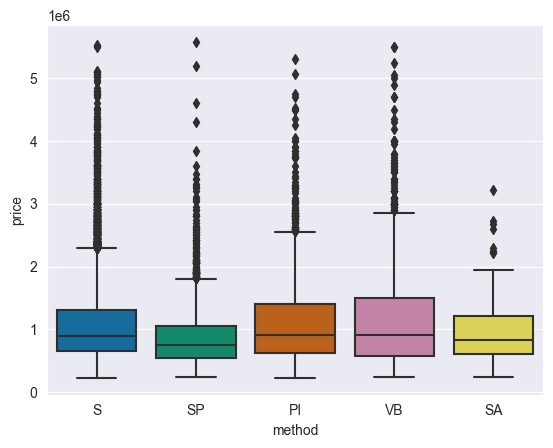

In [60]:
sns.boxplot(data=df, x='method', y='price');

Всего 5 вариантов продажи, больше всего было продано с помощью S - обычная продажа

### SellerG - Агент по недвижимости

In [61]:
describe_cat(df, 'sellerg')

Number of unique values: 305
Nelson           2001
Jellis           1756
hockingstuart    1579
Barry            1392
Ray              1033
                 ... 
Zahn                1
Homes               1
Allan               1
Steveway            1
Point               1
Name: sellerg, Length: 305, dtype: int64


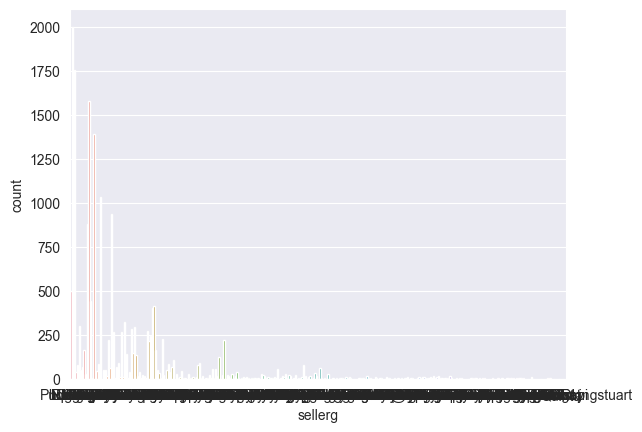

In [62]:
sns.countplot(data=df, x='sellerg');

Всего 305 агентов недвижимости. Лучшие из них продали более 1000 объектов

### CouncilArea - Округа

In [63]:
describe_cat(df, 'councilarea')

Number of unique values: 33
Boroondara City Council           1896
Darebin City Council              1714
Moreland City Council             1335
Glen Eira City Council            1251
Moonee Valley City Council        1161
Melbourne City Council            1159
Banyule City Council               947
Maribyrnong City Council           898
Brimbank City Council              874
Bayside City Council               857
Port Phillip City Council          729
Yarra City Council                 683
Stonnington City Council           674
Monash City Council                640
Hobsons Bay City Council           601
Manningham City Council            558
Hume City Council                  481
Kingston City Council              410
Whittlesea City Council            303
Whitehorse City Council            237
Wyndham City Council               188
Maroondah City Council             165
Knox City Council                  138
Frankston City Council             114
Melton City Council                1

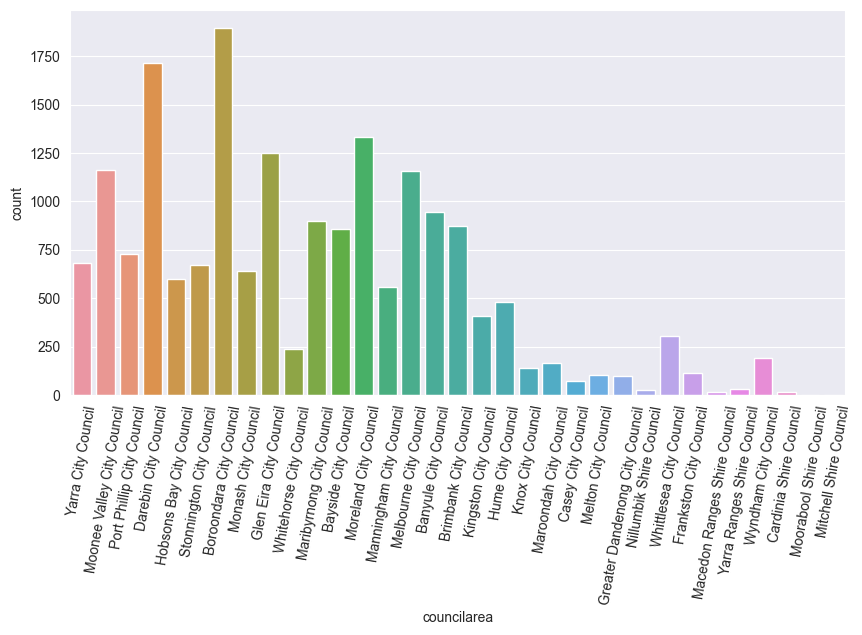

In [64]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=80)
sns.countplot(data=df, x='councilarea');

Всего 33 округа, количество домов расположено неравномерно

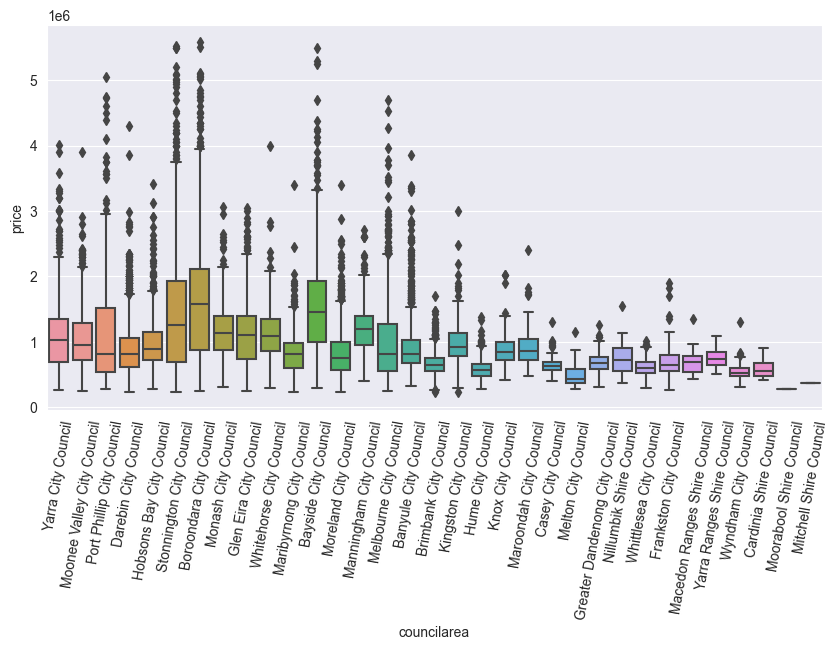

In [65]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=80)
sns.boxplot(data=df, x='councilarea', y='price');

Некоторые округа сильно дороже других

Топ 5 дорогих округов:

In [66]:
df.groupby('councilarea').price.median().sort_values(ascending=False).head(5)

councilarea
Boroondara City Council     1581000.0
Bayside City Council        1450000.0
Stonnington City Council    1254000.0
Manningham City Council     1200000.0
Monash City Council         1133000.0
Name: price, dtype: float64

Топ 5 дешёвых округов:

In [67]:
df.groupby('councilarea').price.median().sort_values().head()

councilarea
Moorabool Shire Council    285000.0
Mitchell Shire Council     366000.0
Melton City Council        430000.0
Wyndham City Council       530000.0
Cardinia Shire Council     559000.0
Name: price, dtype: float64

### Regionname - Административное деление (Запад, Северо-запад и т.д.)

In [68]:
describe_cat(df, 'regionname')

Number of unique values: 8
Southern Metropolitan         6326
Northern Metropolitan         5305
Western Metropolitan          3875
Eastern Metropolitan          1999
South-Eastern Metropolitan     683
Eastern Victoria                79
Northern Victoria               63
Western Victoria                42
Name: regionname, dtype: int64


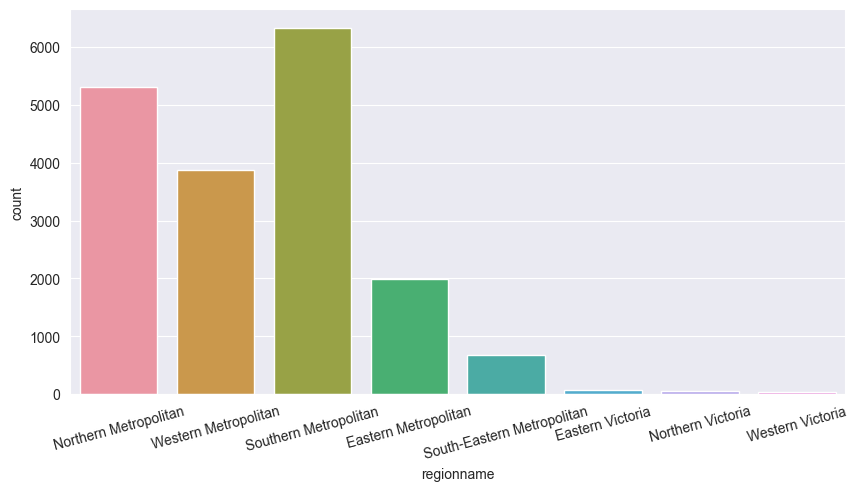

In [69]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=15)
sns.countplot(data=df, x='regionname');

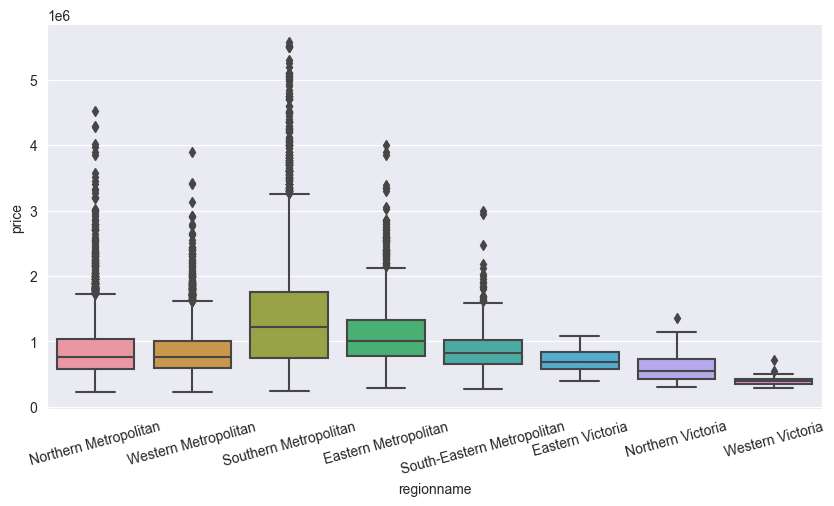

In [70]:
plt.figure(figsize=(10, 5))
plt.xticks(rotation=15)
sns.boxplot(data=df, x='regionname', y='price');

Всего 8 Административных округов. В округе Southern Metropolitan продаётся самая дорогая недвижимость

Топ 5 дорогих Административных округов:

In [71]:
df.groupby('regionname').price.median().sort_values(ascending=False).head()

regionname
Southern Metropolitan         1225000.0
Eastern Metropolitan          1000500.0
South-Eastern Metropolitan     815000.0
Northern Metropolitan          765000.0
Western Metropolitan           765000.0
Name: price, dtype: float64

Топ 5 дешёвых Административных округов:

In [72]:
df.groupby('regionname').price.median().sort_values().head()

regionname
Western Victoria         388750.0
Northern Victoria        547000.0
Eastern Victoria         689000.0
Northern Metropolitan    765000.0
Western Metropolitan     765000.0
Name: price, dtype: float64

# 6. Preprocessing

In [73]:
df.isna().mean().sort_values(ascending=False)

buildingarea     0.578185
yearbuilt        0.513199
landsize         0.260926
car              0.194579
bathroom         0.188864
bedroom2         0.188755
longtitude       0.181353
lattitude        0.181353
propertycount    0.000054
regionname       0.000054
councilarea      0.000054
suburb           0.000000
address          0.000000
postcode         0.000000
distance         0.000000
date             0.000000
sellerg          0.000000
method           0.000000
price            0.000000
type             0.000000
rooms            0.000000
id               0.000000
dtype: float64

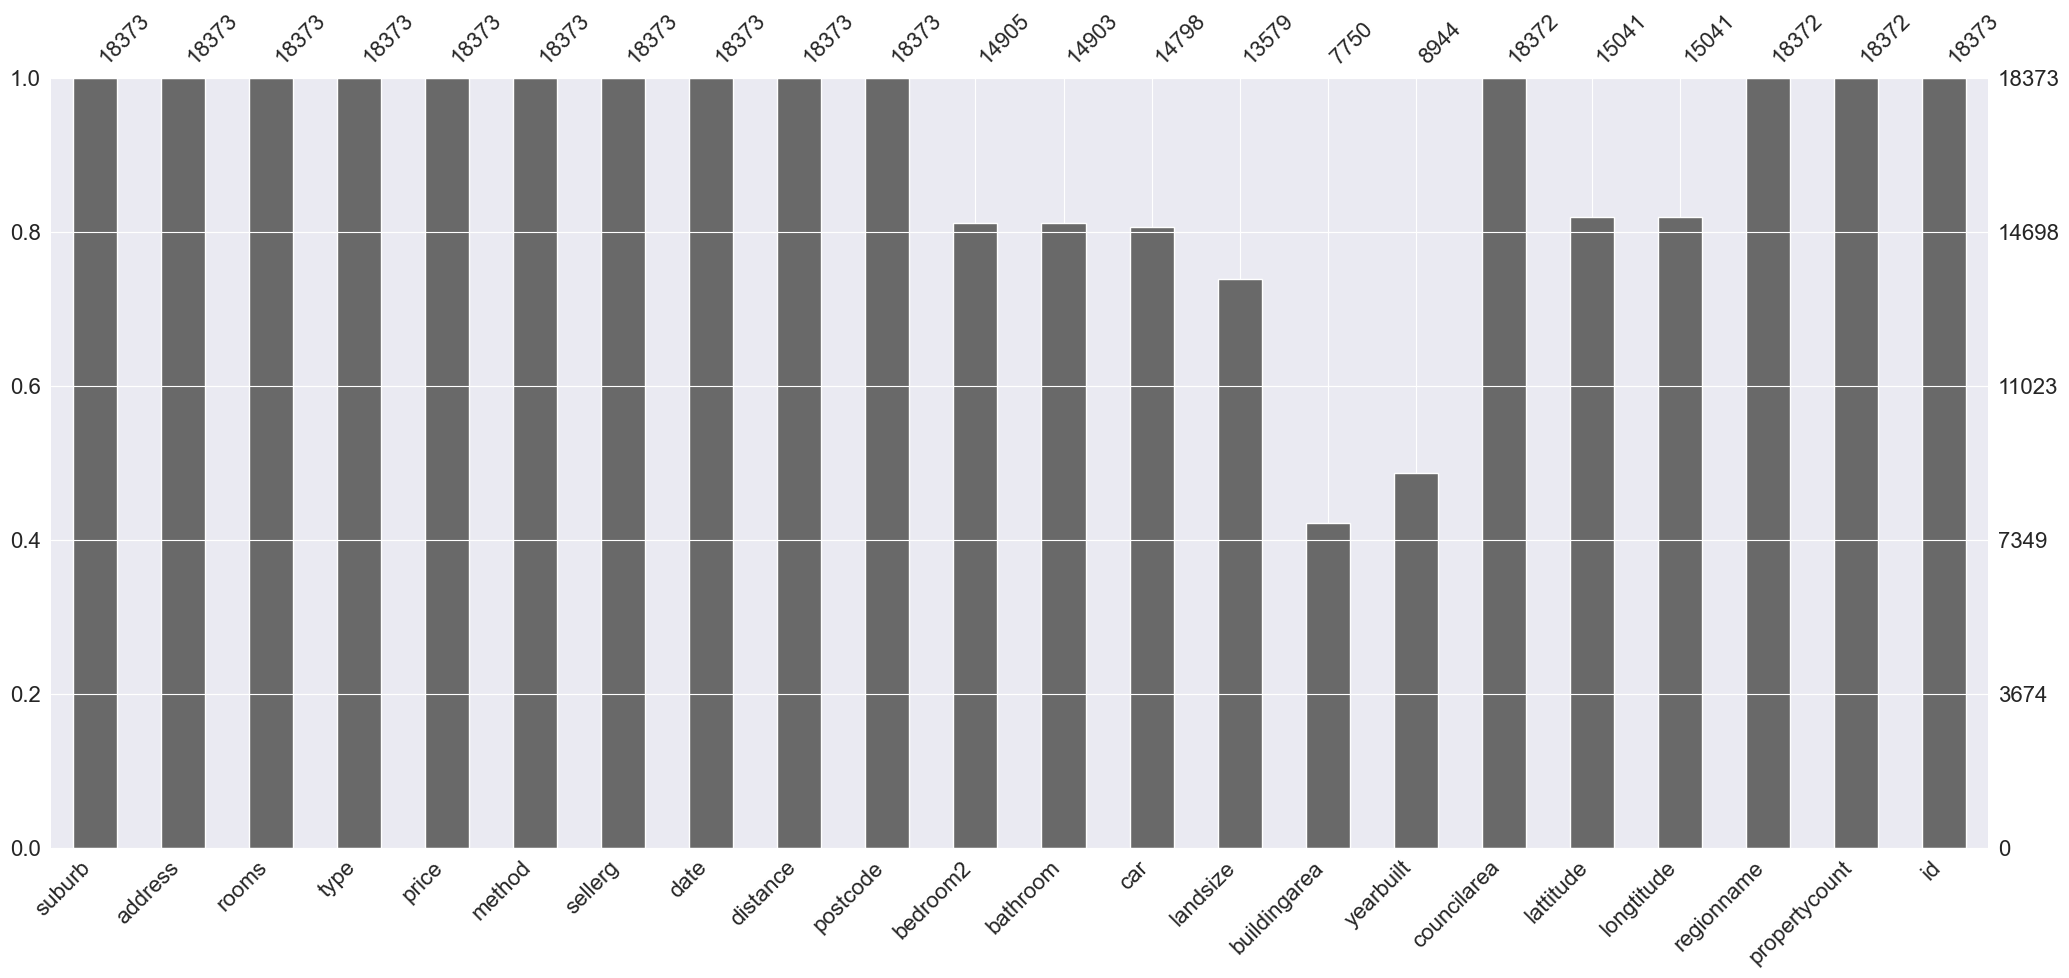

In [74]:
msno.bar(df);

Больше всего пропусков df в buildingarea, yearbuilt и landsize

In [75]:
df_test.isna().mean().sort_values(ascending=False)

buildingarea     0.673169
yearbuilt        0.647086
landsize         0.504990
car              0.366977
bathroom         0.336131
bedroom2         0.335677
longtitude       0.330007
lattitude        0.330007
propertycount    0.000227
regionname       0.000227
councilarea      0.000227
distance         0.000113
postcode         0.000113
suburb           0.000000
address          0.000000
date             0.000000
sellerg          0.000000
method           0.000000
type             0.000000
rooms            0.000000
id               0.000000
dtype: float64

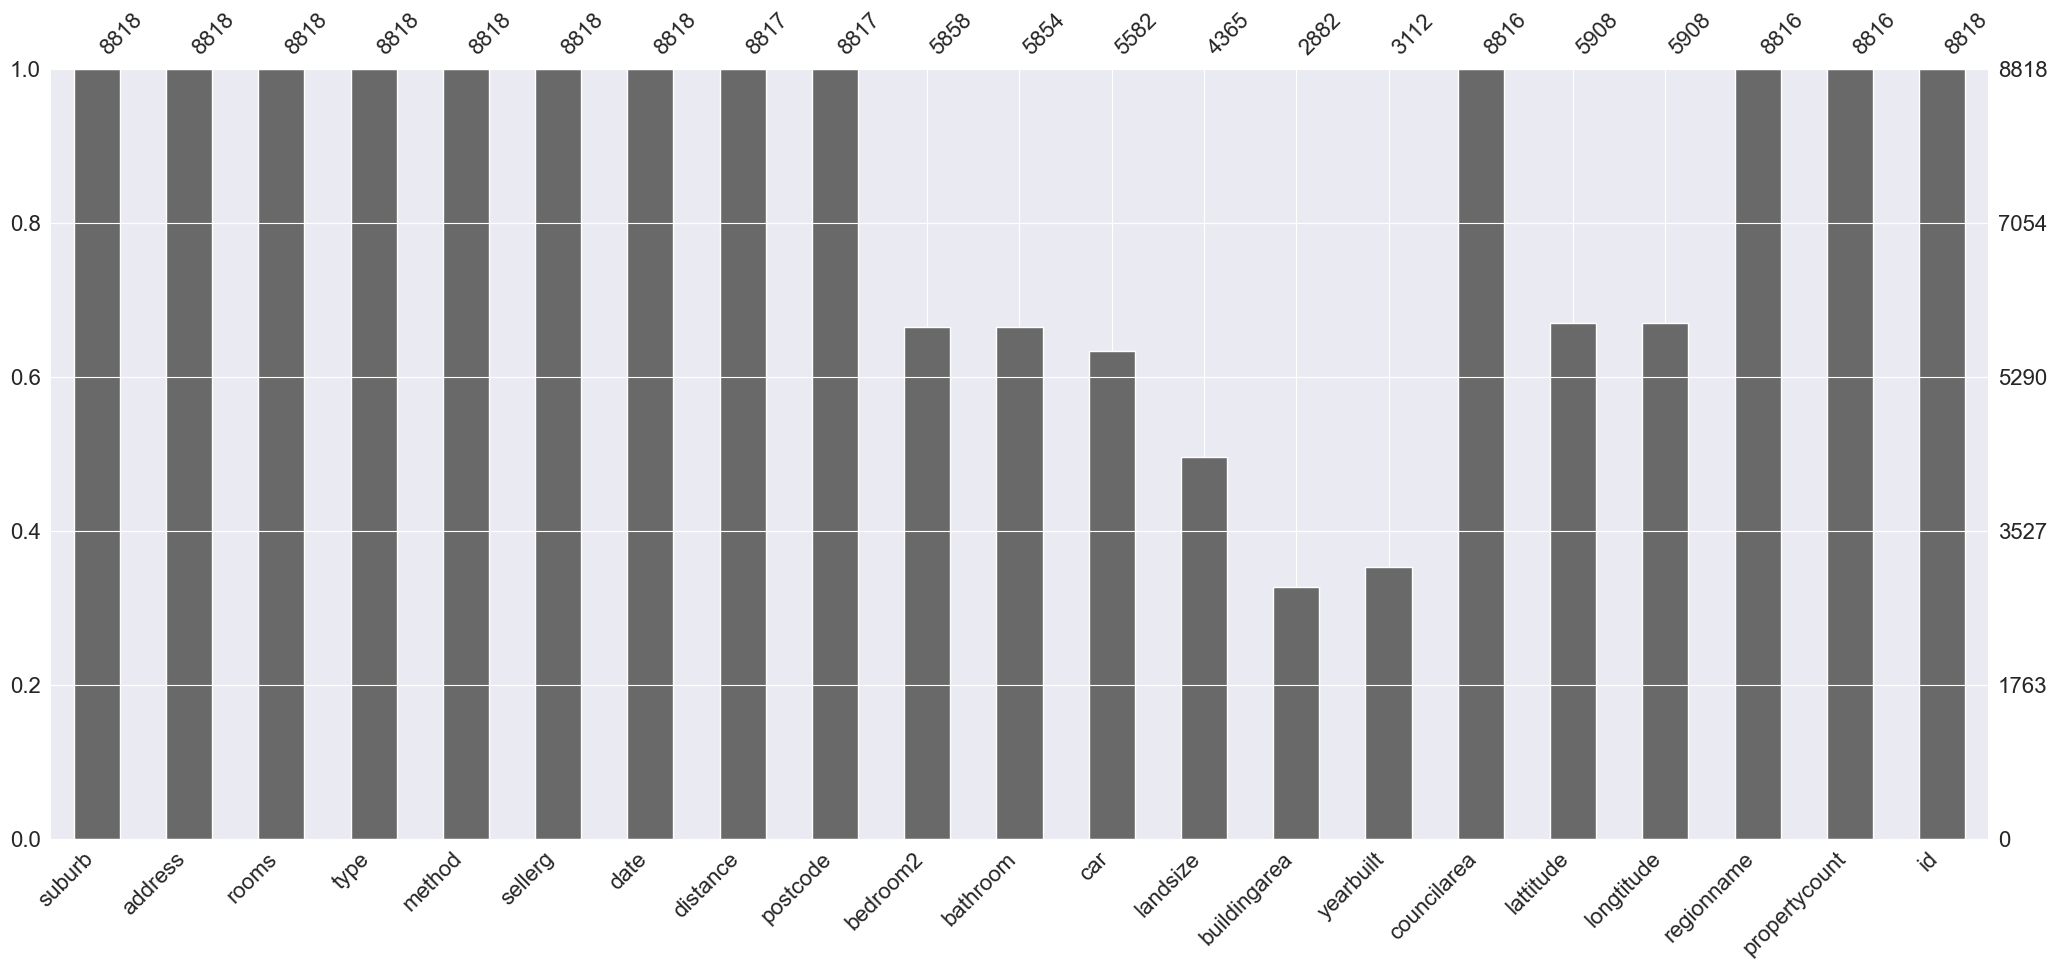

In [76]:
msno.bar(df_test);

Больше всего пропусков в тестовых данных тоже в buildingarea, yearbuilt, landside.
В тестовом датасете больше пропусков

## 6.1 Список всех фич

In [77]:
X = [i for i in df.columns]
X.remove('price')
cat_features = [i for i in df.columns if df[i].dtype == 'object']
y = ['price']

In [78]:
X

['suburb',
 'address',
 'rooms',
 'type',
 'method',
 'sellerg',
 'date',
 'distance',
 'postcode',
 'bedroom2',
 'bathroom',
 'car',
 'landsize',
 'buildingarea',
 'yearbuilt',
 'councilarea',
 'lattitude',
 'longtitude',
 'regionname',
 'propertycount',
 'id']

In [79]:
cat_features

['suburb', 'address', 'type', 'method', 'sellerg', 'councilarea', 'regionname']

## 6.2 Заполнение пропусков

Воспользуюсь инструментом RandomSampleImputer из библиотеки feature-engine
Начну с тренировочных (обучающих данных)

In [80]:
random_inputer = RandomSampleImputer(variables=['bedroom2', 'bathroom', 'car', 'landsize', 'buildingarea', 'yearbuilt', 'lattitude', 'longtitude', 'propertycount', 'councilarea', 'regionname'])
random_inputer.fit(df)

RandomSampleImputer(variables=['bedroom2', 'bathroom', 'car', 'landsize',
                               'buildingarea', 'yearbuilt', 'lattitude',
                               'longtitude', 'propertycount', 'councilarea',
                               'regionname'])

In [81]:
df = random_inputer.transform(df)

In [82]:
df.isna().mean().sort_values(ascending=False)

suburb           0.0
address          0.0
propertycount    0.0
regionname       0.0
longtitude       0.0
lattitude        0.0
councilarea      0.0
yearbuilt        0.0
buildingarea     0.0
landsize         0.0
car              0.0
bathroom         0.0
bedroom2         0.0
postcode         0.0
distance         0.0
date             0.0
sellerg          0.0
method           0.0
price            0.0
type             0.0
rooms            0.0
id               0.0
dtype: float64

Пропусков в обучающей выборке больше нет.
Теперь проделаю тоже самое с тестовой выборкой.

In [83]:
random_inputer = RandomSampleImputer(variables=['bedroom2', 'bathroom', 'car', 'landsize', 'buildingarea', 'yearbuilt', 'lattitude', 'longtitude', 'propertycount', 'councilarea', 'regionname', 'distance', 'postcode'])
random_inputer.fit(df_test)

RandomSampleImputer(variables=['bedroom2', 'bathroom', 'car', 'landsize',
                               'buildingarea', 'yearbuilt', 'lattitude',
                               'longtitude', 'propertycount', 'councilarea',
                               'regionname', 'distance', 'postcode'])

In [84]:
df_test = random_inputer.transform(df_test)

In [85]:
df_test.isna().mean().sort_values(ascending=False)

suburb           0.0
car              0.0
propertycount    0.0
regionname       0.0
longtitude       0.0
lattitude        0.0
councilarea      0.0
yearbuilt        0.0
buildingarea     0.0
landsize         0.0
bathroom         0.0
address          0.0
bedroom2         0.0
postcode         0.0
distance         0.0
date             0.0
sellerg          0.0
method           0.0
type             0.0
rooms            0.0
id               0.0
dtype: float64

Пропусков в тестовой выборке больше нет

## 6.3 Удаление выбросов

### Landsize - прилегающая территория

Обучающая и тестовая выборки до коррекции выбросов:

count     18373.000000
mean        552.128395
std        3506.695907
min           0.000000
25%         179.000000
50%         445.000000
75%         652.000000
max      433014.000000
Name: landsize, dtype: float64


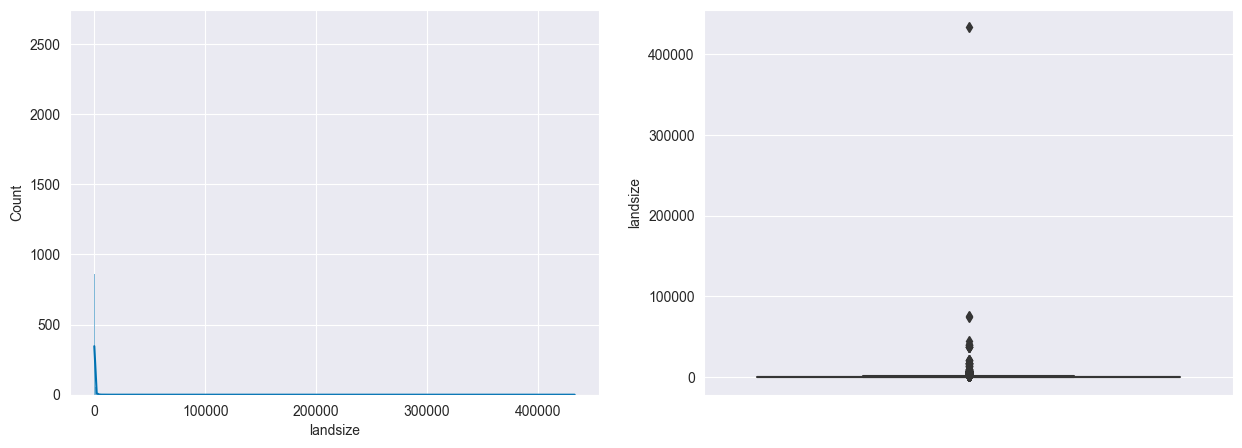

In [87]:
hist_box_describe_num(df, 'landsize')

count      8818.000000
mean        754.870606
std        3625.222268
min          29.000000
25%         409.000000
50%         589.000000
75%         696.000000
max      146699.000000
Name: landsize, dtype: float64


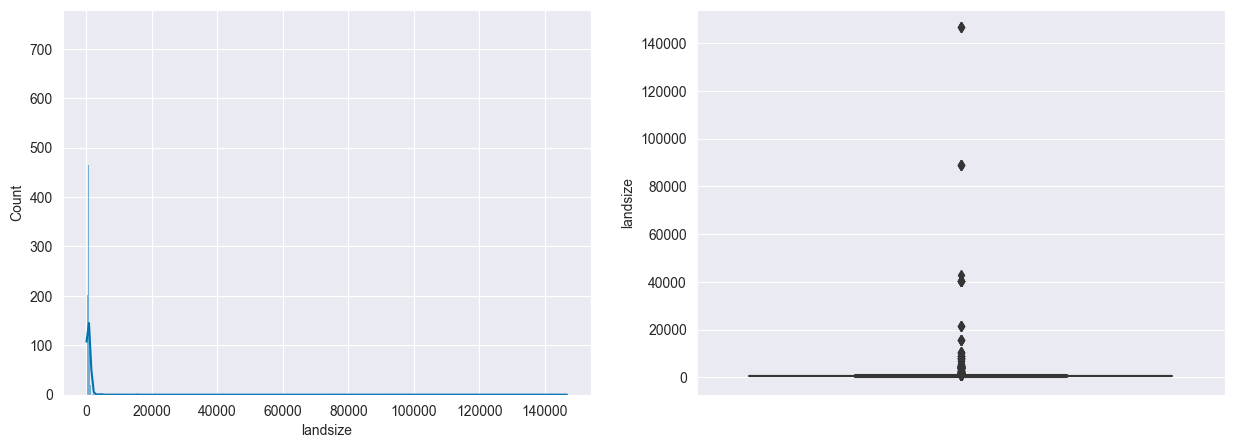

In [88]:
hist_box_describe_num(df_test, 'landsize')

Обучающая и тестовая выборки с коррекцией выбросов:

count    18004.000000
mean       424.393301
std        301.366384
min          0.000000
25%        174.000000
50%        428.000000
75%        647.000000
max       1730.000000
Name: landsize, dtype: float64


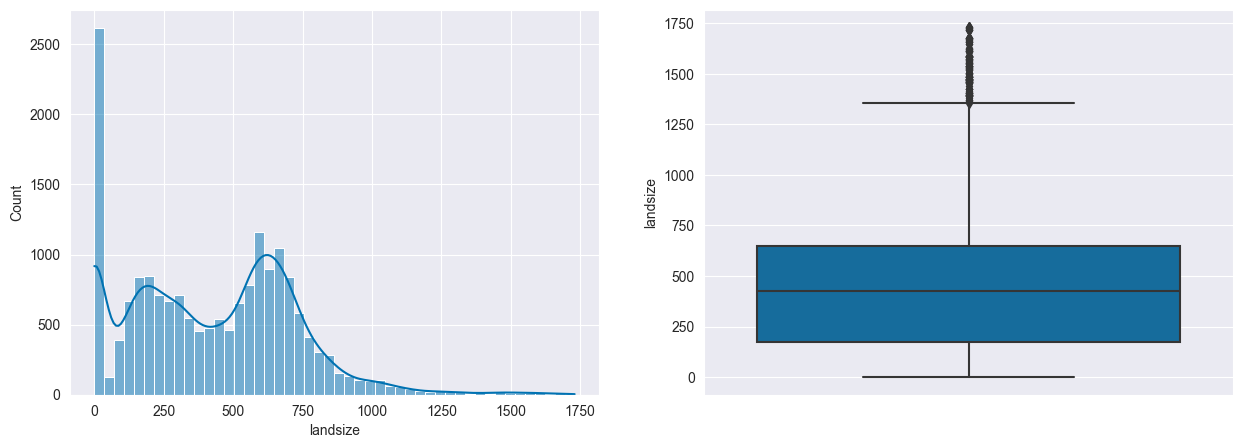

In [89]:
hist_box_describe_num(df.query('landsize < 1750'), 'landsize')

count    8702.000000
mean      563.132958
std       226.524531
min        29.000000
25%       406.000000
50%       586.000000
75%       690.000000
max      1727.000000
Name: landsize, dtype: float64


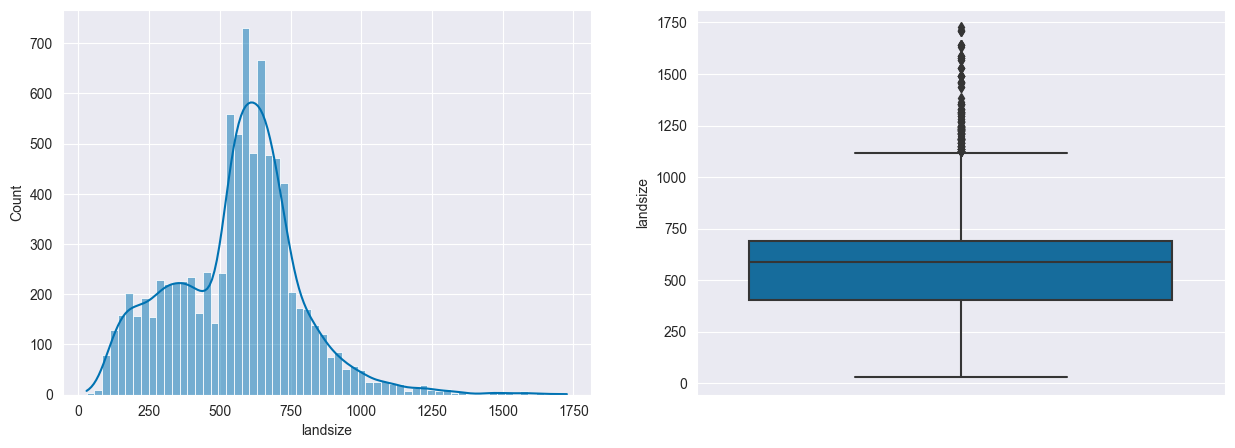

In [90]:
hist_box_describe_num(df_test.query('landsize < 1750'), 'landsize')

Сокращу прилегающую территорию до 1750. Это действие удалит ≈ 2% данных в текущей выборке

In [91]:
df = df.query('landsize < 1750')

count    18004.000000
mean       424.393301
std        301.366384
min          0.000000
25%        174.000000
50%        428.000000
75%        647.000000
max       1730.000000
Name: landsize, dtype: float64


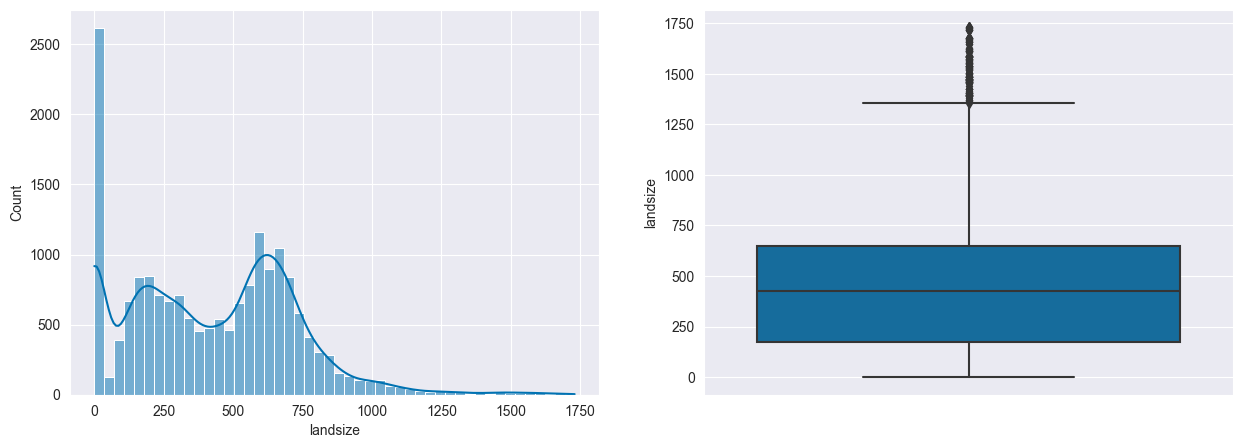

In [92]:
hist_box_describe_num(df, 'landsize')

### YearBuilt - Год постройки

Обучающая и тестовая выборки до коррекции выбросов:

count    18004.000000
mean      1965.516830
std         37.022939
min       1196.000000
25%       1945.000000
50%       1970.000000
75%       2000.000000
max       2018.000000
Name: yearbuilt, dtype: float64


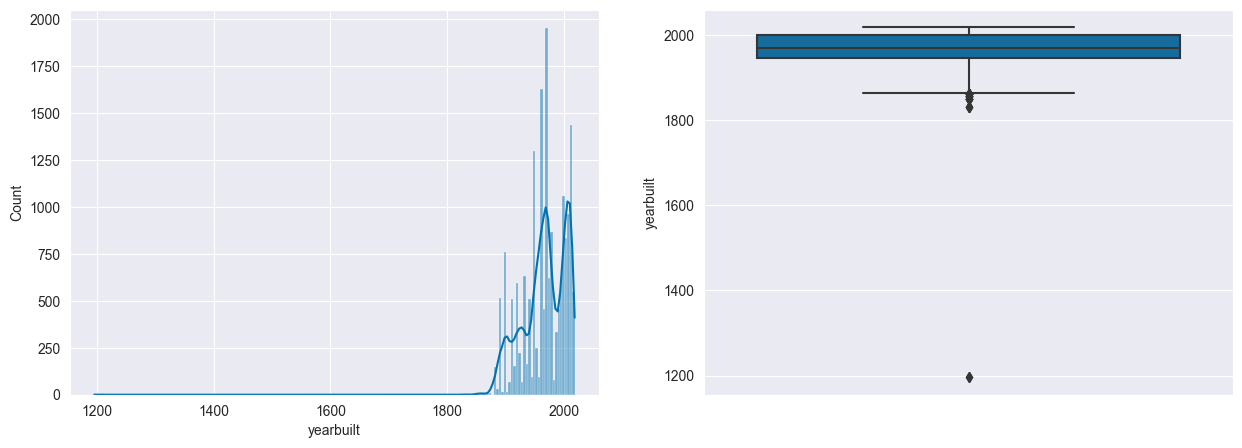

In [93]:
hist_box_describe_num(df, 'yearbuilt')

count    8818.000000
mean     1968.747675
std        35.844354
min      1820.000000
25%      1950.000000
50%      1975.000000
75%      2000.000000
max      2019.000000
Name: yearbuilt, dtype: float64


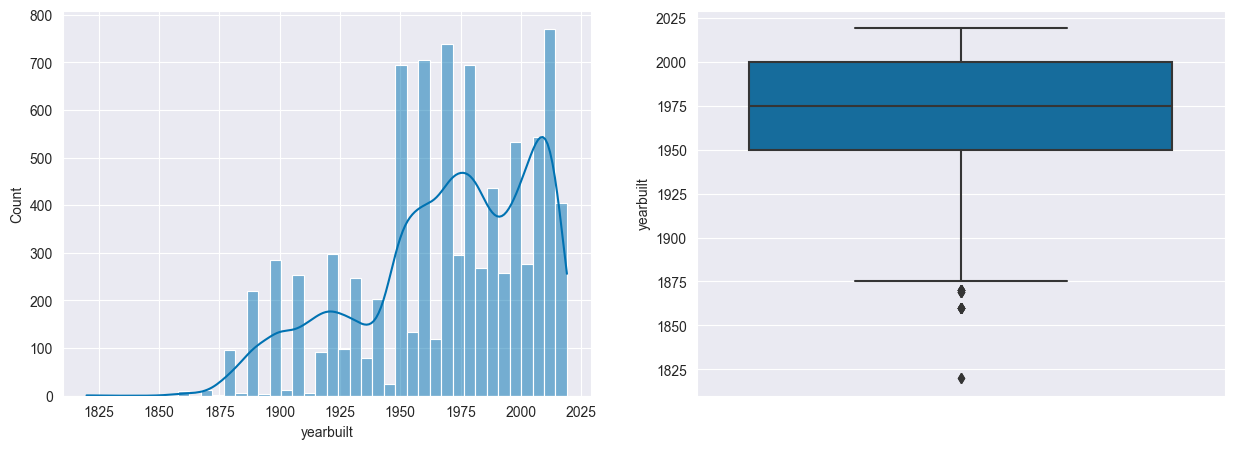

In [94]:
hist_box_describe_num(df_test, 'yearbuilt')

Обучающая и тестовая выборки с коррекцией выбросов:

count    17957.000000
mean      1965.871638
std         35.762411
min       1877.000000
25%       1946.000000
50%       1970.000000
75%       2000.000000
max       2018.000000
Name: yearbuilt, dtype: float64


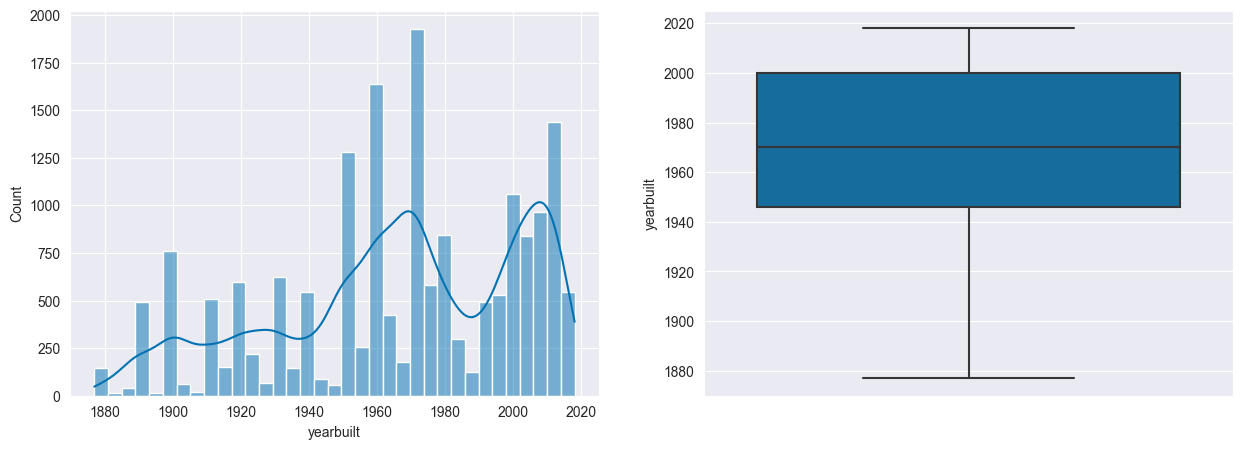

In [95]:
hist_box_describe_num(df.query('yearbuilt > 1875'), 'yearbuilt')

count    8792.000000
mean     1969.061761
std        35.420791
min      1877.000000
25%      1950.000000
50%      1975.000000
75%      2000.000000
max      2019.000000
Name: yearbuilt, dtype: float64


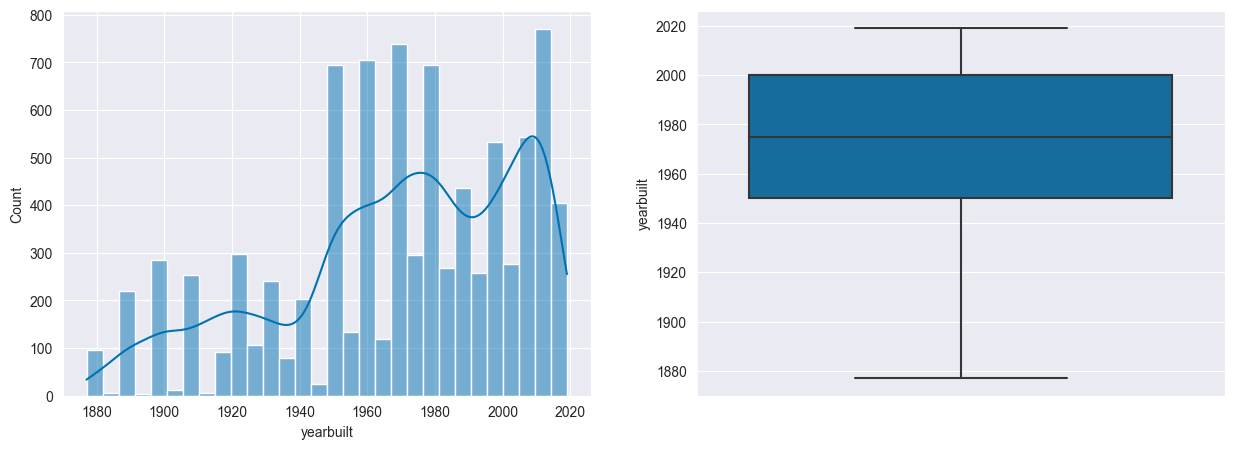

In [96]:
hist_box_describe_num(df_test.query('yearbuilt > 1875'), 'yearbuilt')

Сокращу год постройки с 1875 по 2018. Это действие удалит ≈ 0.3% данных от текущей выборки.

In [97]:
df = df.query('yearbuilt > 1875')

count    17957.000000
mean      1965.871638
std         35.762411
min       1877.000000
25%       1946.000000
50%       1970.000000
75%       2000.000000
max       2018.000000
Name: yearbuilt, dtype: float64


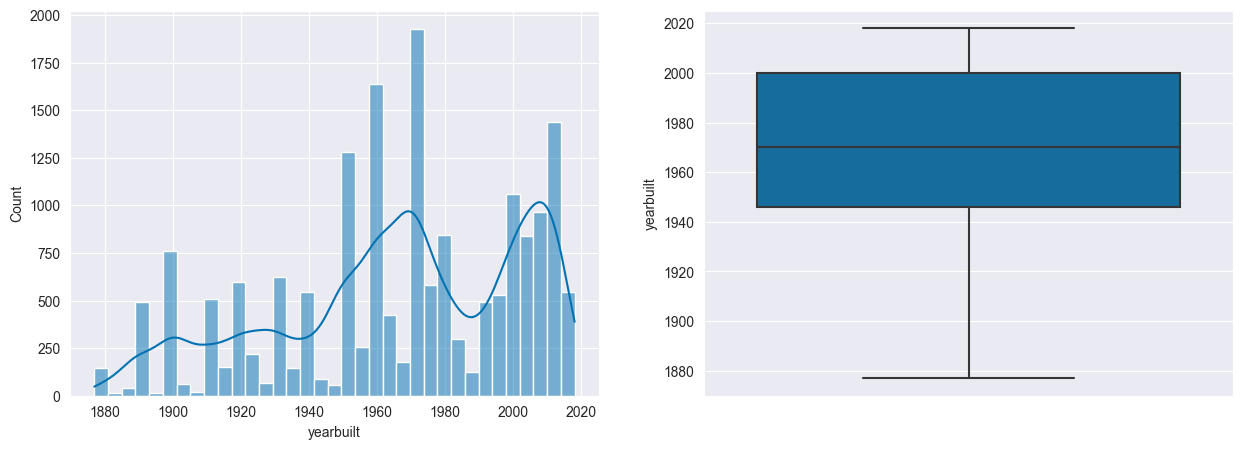

In [98]:
hist_box_describe_num(df, 'yearbuilt')

### BuildingArea - Площадь дома

Обучающая и тестовая выборки до коррекции выбросов:

count    17957.000000
mean       150.342118
std        484.169254
min          0.000000
25%         93.000000
50%        126.000000
75%        173.000000
max      44515.000000
Name: buildingarea, dtype: float64


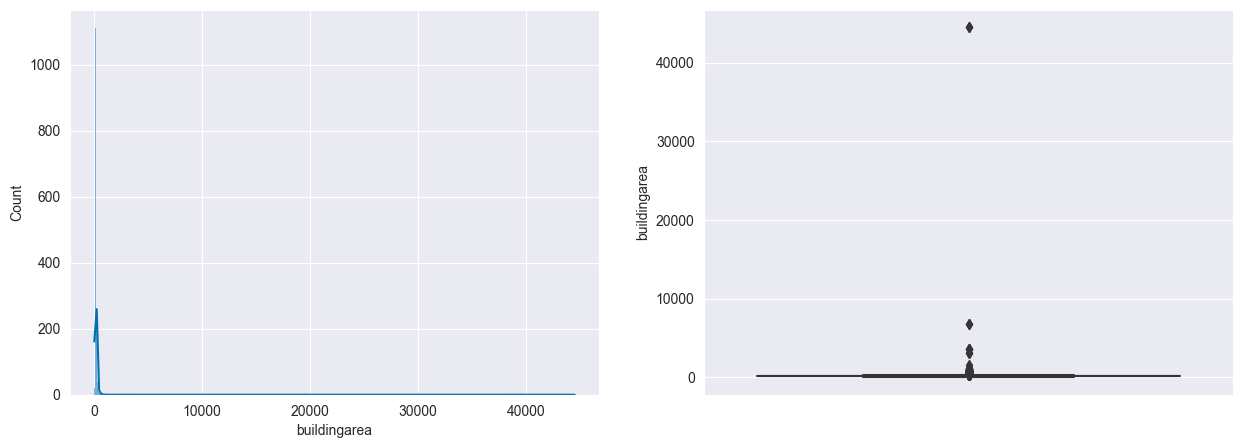

In [99]:
hist_box_describe_num(df, 'buildingarea')

count    8818.000000
mean      171.340213
std       139.114938
min         0.000000
25%       118.000000
50%       151.000000
75%       202.000000
max      6178.000000
Name: buildingarea, dtype: float64


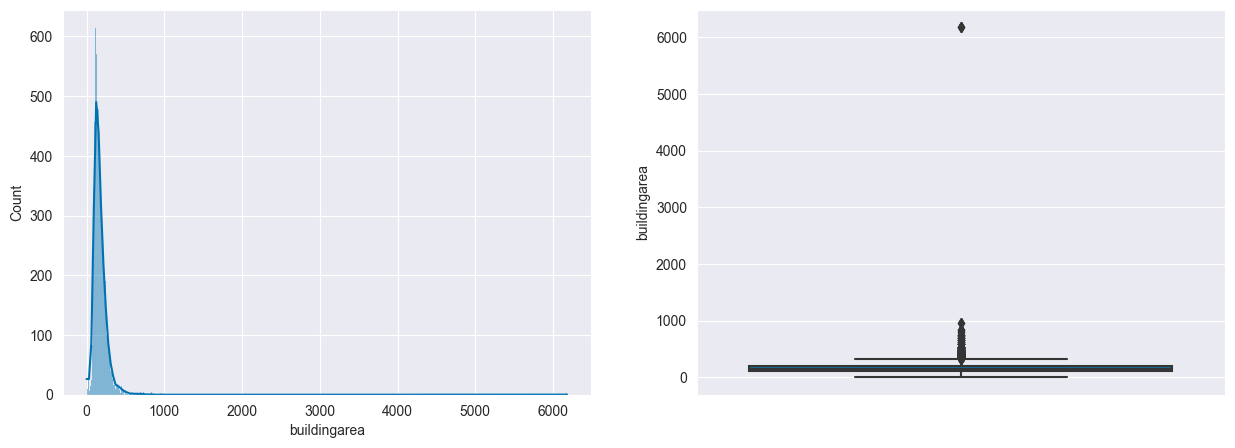

In [100]:
hist_box_describe_num(df_test, 'buildingarea')

Обучающая и тестовая выборки с коррекцией выбросов:

count    17879.000000
mean       141.343693
std         75.706024
min          0.000000
25%         93.000000
50%        125.000000
75%        171.000000
max        594.000000
Name: buildingarea, dtype: float64


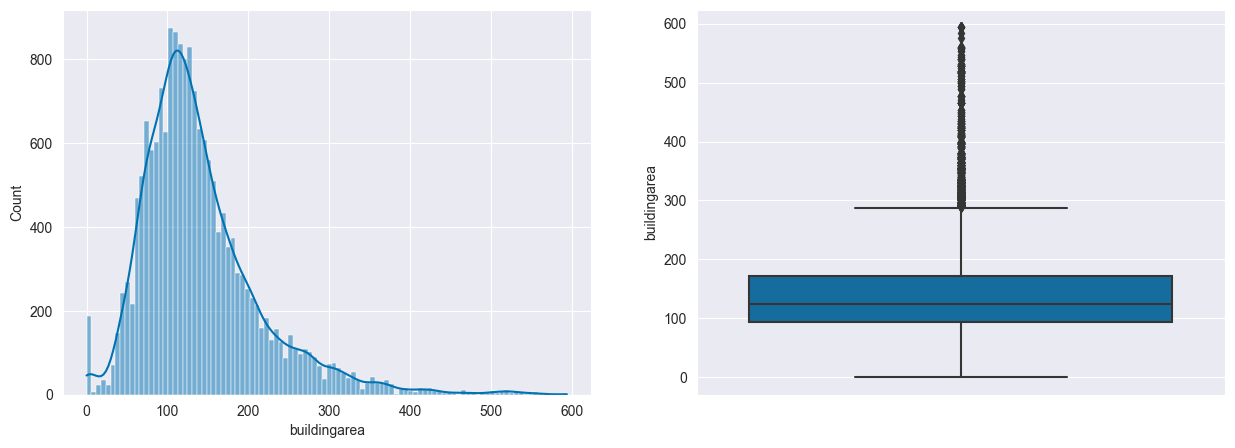

In [101]:
hist_box_describe_num(df.query('buildingarea < 600'), 'buildingarea')

count    8780.000000
mean      167.104670
std        76.563703
min         0.000000
25%       117.000000
50%       151.000000
75%       200.250000
max       594.000000
Name: buildingarea, dtype: float64


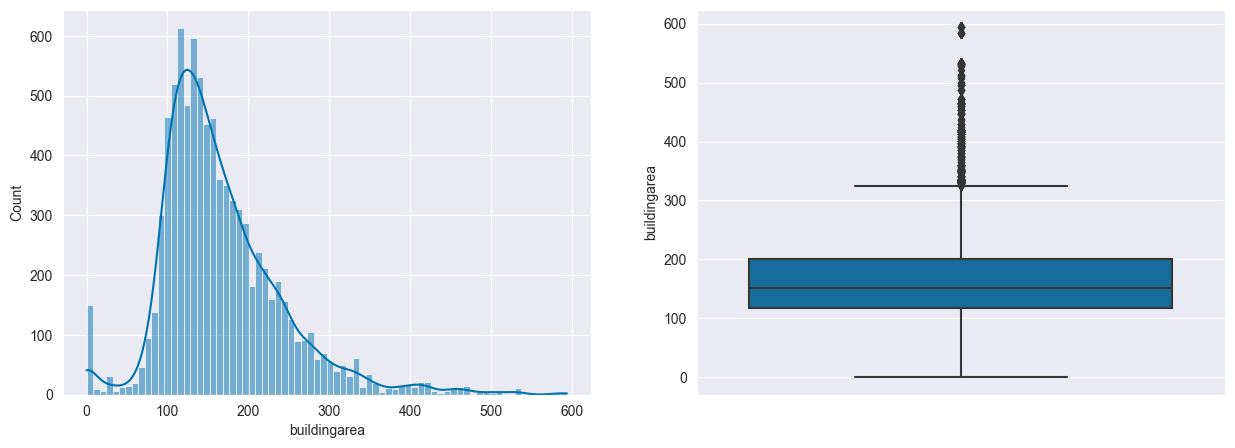

In [102]:
hist_box_describe_num(df_test.query('buildingarea < 600'), 'buildingarea')

Сокращу площадь дома до 600м². Это действие удалит ≈0.5% от текущей выборки

In [103]:
df = df.query('buildingarea < 600')

count    17879.000000
mean       141.343693
std         75.706024
min          0.000000
25%         93.000000
50%        125.000000
75%        171.000000
max        594.000000
Name: buildingarea, dtype: float64


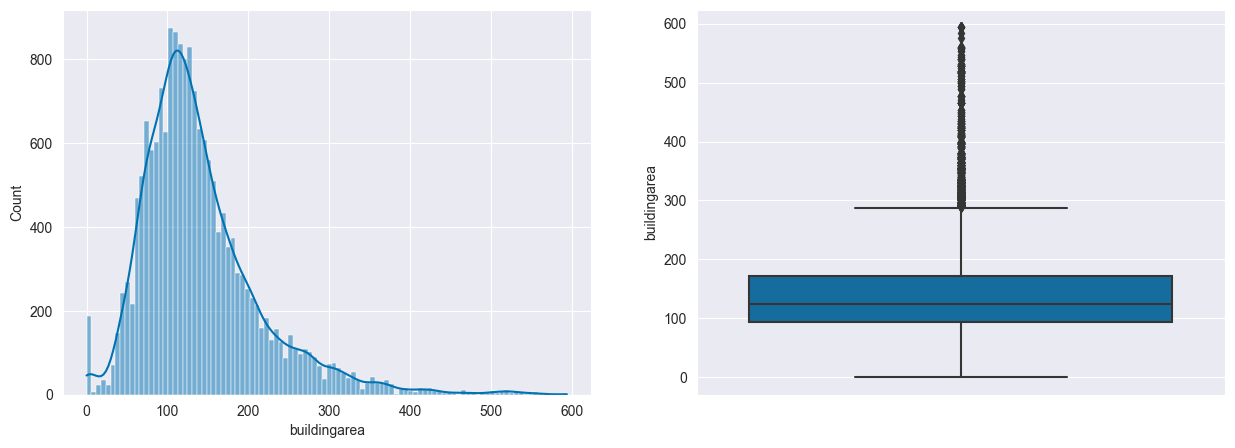

In [104]:
hist_box_describe_num(df, 'buildingarea')

### ИТОГ по выбросам:

Суммарно было удалено 515 объектов из обучающей выборки размером в 18373 объекта, что составляет ≈3% от исходных данных.

# 7. Modeling

In [105]:
sssssssssssssssss

NameError: name 'sssssssssssssssss' is not defined

## Baseline Catboost

### Тренировочная и тестовая выборки

In [ ]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

### Составляю список фич для модели

Ещё раз посмотрим на корреляцию фич, после заполнения пропусков и удаления выбросов

In [ ]:
plt.figure(figsize=(16,9))
sns.heatmap(round(train.corr(),2),annot=True,cmap="coolwarm")
plt.show()

Проверим смарт корреляцией, стоит ли выкидывать какие-нибудь признаки в baseline модели

In [ ]:
correlated = SmartCorrelatedSelection(
    variables= None,
    method = 'pearson',
    threshold = 0.8,
    missing_values = 'ignore',
    selection_method = 'variance',
    estimator=None,
    scoring = 'roc_auc',
    cv=5)

correlated.fit(train)

Смарт корреляция не рекомендует конкретных столбцов к дропу

In [ ]:
correlated.features_to_drop_

Выведу все фичи, а так же cat_features и target отдельно

In [ ]:
print(X, cat_features, y, sep='\n')

### Подготовлю данные для catboost`а

In [ ]:
train_data = Pool(data=train[X], label=train[y], cat_features=cat_features)

Настраиваю гиперпараметры:

In [ ]:
parameters = {'cat_features': cat_features,
              'learning_rate': 0.05,
              'eval_metric': 'MAPE',
              'loss_function': 'MAE',
              'random_seed': 42,
              'verbose':100}

### Кросс-валидация

In [ ]:
%%time
cv_data = cv(
    params = parameters,
    pool = train_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False
)

In [ ]:
cv_data

### Нахождение наилучших параметров

In [ ]:
cv_data['test-MAE-mean'].min()

In [ ]:
cv_data[cv_data['test-MAE-mean'] == cv_data['test-MAE-mean'].min()]

In [ ]:
n_iters = cv_data[cv_data['test-MAE-mean'] == cv_data['test-MAE-mean'].min()]['iterations'].values[0]

Лучшая итерация:

In [ ]:
n_iters

### Обучение на лучших параметрах

In [ ]:
parameters = {'cat_features': cat_features,
              'learning_rate': 0.05,
              'iterations': n_iters,
              'eval_metric': 'MAPE',
              'loss_function': 'MAE',
              'random_seed': 42,
              'verbose':100}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
model.fit(train_data, plot=True)

### Просмотр результатов

In [ ]:
joblib.dump(model, 'catboost5.pkl', compress=9)

In [ ]:
model_pkl = joblib.load('catboost5.pkl')

In [ ]:
test['predict'] = model_pkl.predict(test[X])

In [ ]:
test.head()

Напишу функцию для ошибки

In [ ]:
def error(y_true, y_pred):
    print(mean_absolute_error(y_true, y_pred))
    print(mean_absolute_percentage_error(y_true, y_pred))

Посмотрю ошибку на 80% обучающих данных

In [ ]:
error(test['price'], test['predict'])

149691.90450363138
0.12988072481328633

### Обучение на ВСЕХ данных

In [ ]:
parameters = {'cat_features': cat_features,
              'learning_rate': 0.05,
              'iterations': n_iters,
              'eval_metric': 'MAPE',
              'loss_function': 'MAE',
              'random_seed': 42,
              'verbose':100}

In [ ]:
model = CatBoostRegressor(**parameters)

In [ ]:
train_full_data = Pool(df[X], label=df[y], cat_features=cat_features)

In [ ]:
model.fit(train_full_data)

In [ ]:
model.predict(df_test[X])

In [ ]:
y_pred = model.predict(df_test[X])

### Сохранение в csv

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['Price'] = y_pred
submission.to_csv('Catboost_CV_BASELINE_LF-MAE_LR_005.LCR3.csv', index=False)

In [ ]:
submission.head()

Kaggle 15.05127

## Catboost drop features

### Тренировочная и тестовая выборки

In [279]:
train, test = train_test_split(df, test_size=0.2, random_state=42)

### Составляю список фич для модели

In [280]:
X = [i for i in df.columns]
X.remove('price')
cat_features = [i for i in df.columns if df[i].dtype == 'object']
y = ['price']

In [281]:
X

['suburb',
 'address',
 'rooms',
 'type',
 'method',
 'sellerg',
 'date',
 'distance',
 'postcode',
 'bedroom2',
 'bathroom',
 'car',
 'landsize',
 'buildingarea',
 'yearbuilt',
 'councilarea',
 'lattitude',
 'longtitude',
 'regionname',
 'propertycount',
 'id']

Удалю ненужные фичи

In [282]:
X.remove('date')
X.remove('id')
# X.remove('longtitude')
# X.remove('lattitude')
# X.remove('address')
# cat_features.remove('address')
# X.remove('method')
# cat_features.remove('method')
# X.remove('car')
# X.remove('yearbuilt')
# X.remove('sellerg')
# cat_features.remove('sellerg')
# X.remove('landsize')
# X.remove('buildingarea')
# X.remove('propertycount')
# X.remove('postcode')
# X.remove('bedroom2')

Выведу все фичи, а так же cat_features и target отдельно

In [283]:
print(X, cat_features, y, sep='\n')

['suburb', 'address', 'rooms', 'type', 'method', 'sellerg', 'date', 'distance', 'postcode', 'bedroom2', 'bathroom', 'car', 'landsize', 'buildingarea', 'yearbuilt', 'councilarea', 'lattitude', 'longtitude', 'regionname', 'propertycount', 'id']
['suburb', 'address', 'type', 'method', 'sellerg', 'councilarea', 'regionname']
['price']


### Подготовлю данные для catboost`а

In [284]:
train_data = Pool(data=train[X], label=train[y], cat_features=cat_features)

Настраиваю гиперпараметры:

In [285]:
parameters = {'cat_features': cat_features,
              'learning_rate': 0.05,
              'eval_metric': 'MAPE',
              'loss_function': 'MAE',
              'random_seed': 42,
              'verbose':100}

### Кросс-валидация

In [286]:
%%time
cv_data = cv(
    params = parameters,
    pool = train_data,
    fold_count=5,
    shuffle=True,
    partition_random_seed=0,
    stratified=False,
    verbose=False
)

Training on fold [0/5]

bestTest = 0.1549542583
bestIteration = 884

Training on fold [1/5]

bestTest = 0.1528090225
bestIteration = 986

Training on fold [2/5]

bestTest = 0.14827396
bestIteration = 999

Training on fold [3/5]

bestTest = 0.151449655
bestIteration = 961

Training on fold [4/5]

bestTest = 0.1530399895
bestIteration = 999

CPU times: total: 12min 20s
Wall time: 2min 27s


In [287]:
cv_data

,iterations,test-MAPE-mean,test-MAPE-std,train-MAPE-mean,train-MAPE-std,test-MAE-mean,test-MAE-std,train-MAE-mean,train-MAE-std
0,0,0.944651,0.000791,0.944690,0.000097,1.010051e+06,14397.684550,1.010067e+06,3352.041881
1,1,0.894198,0.001266,0.894294,0.000144,9.668163e+05,14477.691624,9.668792e+05,3270.703486
2,2,0.844908,0.001810,0.844995,0.000224,9.266352e+05,14620.902031,9.266887e+05,3130.418312
3,3,0.798168,0.002246,0.797847,0.000789,8.879837e+05,15027.789034,8.876860e+05,2621.790989
4,4,0.754080,0.002499,0.753581,0.000395,8.499239e+05,14577.651628,8.495200e+05,2871.091528
...,...,...,...,...,...,...,...,...,...
995,995,0.152136,0.002476,0.122759,0.000842,1.691738e+05,4062.854238,1.423631e+05,1333.042497
996,996,0.152139,0.002474,0.122741,0.000845,1.691726e+05,4069.220531,1.423441e+05,1333.421114
997,997,0.152150,0.002495,0.122728,0.000854,1.691764e+05,4074.486421,1.423295e+05,1343.870346
998,998,0.152149,0.002495,0.122711,0.000853,1.691701e+05,4074.653690,1.423108e+05,1343.805352


### Нахождение наилучших параметров

In [288]:
cv_data['test-MAE-mean'].min()

169170.0502794838

lr005-173459, lrauto-175241, drop-174121, otherEMI 171140, noEMI 172953, NO_TTS-171761, otherEMI2-178027, Best_kaggle-173991, drop1-176542

In [289]:
cv_data[cv_data['test-MAE-mean'] == cv_data['test-MAE-mean'].min()]

,iterations,test-MAPE-mean,test-MAPE-std,train-MAPE-mean,train-MAPE-std,test-MAE-mean,test-MAE-std,train-MAE-mean,train-MAE-std
998,998,0.152149,0.002495,0.122711,0.000853,169170.050279,4074.65369,142310.820959,1343.805352


In [290]:
n_iters = cv_data[cv_data['test-MAE-mean'] == cv_data['test-MAE-mean'].min()]['iterations'].values[0]

Лучшая итерация:

In [291]:
n_iters

998

### Обучение на лучших параметрах

In [292]:
parameters = {'cat_features': cat_features,
              'learning_rate': 0.05,
              'iterations': n_iters,
              'eval_metric': 'MAPE',
              'loss_function': 'MAE',
              'random_seed': 42,
              'verbose':100}

In [293]:
model = CatBoostRegressor(**parameters)

In [294]:
model.fit(train_data)

0:	learn: 0.4085517	total: 28.1ms	remaining: 28.1s
100:	learn: 0.1699274	total: 3.41s	remaining: 30.3s
200:	learn: 0.1573509	total: 6.81s	remaining: 27s
300:	learn: 0.1488016	total: 10.1s	remaining: 23.5s
400:	learn: 0.1430830	total: 12.9s	remaining: 19.3s
500:	learn: 0.1387001	total: 15.7s	remaining: 15.6s
600:	learn: 0.1352712	total: 18.8s	remaining: 12.4s
700:	learn: 0.1323120	total: 22.3s	remaining: 9.44s
800:	learn: 0.1297984	total: 25.3s	remaining: 6.23s
900:	learn: 0.1274215	total: 28.6s	remaining: 3.08s
997:	learn: 0.1255004	total: 31.3s	remaining: 0us


### Просмотр результатов

In [295]:
joblib.dump(model, 'catboost6.pkl', compress=9)

['catboost6.pkl']

In [296]:
model_pkl = joblib.load('catboost6.pkl')

In [297]:
test['predict'] = model_pkl.predict(test[X])

In [298]:
test.head()

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,bedroom2,bathroom,car,landsize,buildingarea,yearbuilt,councilarea,lattitude,longtitude,regionname,propertycount,id,predict
4799,Malvern,1/11 Mayfield Av,2,u,2660000.0,S,Jellis,2016-12-03,7.4,3144.0,4.0,2.0,1.0,83.0,305.0,1950.0,Stonnington City Council,-37.92184,144.82830,Southern Metropolitan,4675.0,8117,8.797425e+05
11356,South Melbourne,4 Law St,2,h,1030000.0,S,Cayzer,2017-07-01,1.9,3205.0,3.0,1.0,2.0,429.0,165.0,1890.0,Port Phillip City Council,-37.92640,144.96120,Southern Metropolitan,5943.0,13367,1.680334e+06
12681,Lalor,78 French St,2,h,685000.0,S,Love,2017-06-24,16.3,3075.0,2.0,1.0,2.0,766.0,146.0,1940.0,Whittlesea City Council,-37.66986,145.02048,Northern Metropolitan,8279.0,23270,7.069251e+05
14908,St Kilda,7/59 Carlisle St,2,u,530000.0,SA,Woodards,2017-07-22,5.0,3182.0,2.0,1.0,0.0,0.0,160.0,2000.0,Port Phillip City Council,-37.86756,144.98303,Southern Metropolitan,13240.0,20889,5.585078e+05
17147,Prahran,26 Union St,3,h,1100000.0,S,hockingstuart,2017-08-19,4.6,3181.0,3.0,1.0,2.0,0.0,46.0,1987.0,Stonnington City Council,-37.71878,144.99717,Southern Metropolitan,7717.0,20120,1.617920e+06


Напишу функцию для ошибки

In [299]:
def error(y_true, y_pred):
    print(mean_absolute_error(y_true, y_pred))
    print(mean_absolute_percentage_error(y_true, y_pred))

Посмотрю ошибку на 80% обучающих данных

In [300]:
error(test['price'], test['predict'])

173517.20096340554
0.15481326463988204


lr005-0.1580, lrauto-0.1578, drop-0.1565, drop_date-0.1569, otherEMI1 0.1559, noEMI 0.1576, otherEMI, best_kaggle-0.1576, drop1-0.1592

### Обучение на ВСЕХ данных

In [301]:
parameters = {'cat_features': cat_features,
              'learning_rate': 0.05,
              'iterations': n_iters,
              'eval_metric': 'MAPE',
              'loss_function': 'MAE',
              'random_seed': 42,
              'verbose':100}

In [302]:
model = CatBoostRegressor(**parameters)

In [303]:
train_full_data = Pool(df[X], label=df[y], cat_features=cat_features)

In [304]:
model.fit(train_full_data)

0:	learn: 0.4101751	total: 44.2ms	remaining: 44.1s
100:	learn: 0.1702539	total: 3.71s	remaining: 32.9s
200:	learn: 0.1577196	total: 6.99s	remaining: 27.7s
300:	learn: 0.1496160	total: 10.2s	remaining: 23.7s
400:	learn: 0.1443222	total: 13.5s	remaining: 20.1s
500:	learn: 0.1404439	total: 16.7s	remaining: 16.6s
600:	learn: 0.1373682	total: 19.9s	remaining: 13.1s
700:	learn: 0.1344434	total: 23.1s	remaining: 9.77s
800:	learn: 0.1320949	total: 26.3s	remaining: 6.46s
900:	learn: 0.1300632	total: 29.5s	remaining: 3.17s
997:	learn: 0.1282303	total: 32.6s	remaining: 0us


In [305]:
model.predict(df_test[X])

array([ 806360.12434516, 1458588.54211613, 1382788.5147572 , ...,
        647327.21448076, 1470744.66813737,  832795.19503264])

In [306]:
y_pred = model.predict(df_test[X])

### Feature importance

Посмотрю на важность фичей

In [307]:
model.get_feature_importance(prettified=True)

,Feature Id,Importances
0,rooms,17.858641
1,distance,12.198854
2,type,11.605949
3,suburb,8.764855
4,landsize,6.949031
5,regionname,6.618634
6,councilarea,5.393742
7,bathroom,4.771350
8,sellerg,4.065881
9,buildingarea,3.377078


### Сохранение в csv

In [308]:
submission = pd.DataFrame(df_test['id'])
submission['Price'] = y_pred
submission.to_csv('Catboost_CV_BASELINE_LF-MAE_LR_005_NODROP1_Emi.csv', index=False)

In [309]:
submission.head()

,id,Price
0,30130,8.063601e+05
1,18311,1.458589e+06
2,18934,1.382789e+06
3,1824,8.156765e+05
4,31339,9.236254e+05


In [135]:
dddddddddd

NameError: name 'dddddddddd' is not defined

## Random forest Baseline

In [228]:
rf = df
rf_test = df_test

In [229]:
rf.head()

,suburb,address,rooms,type,price,method,sellerg,date,distance,postcode,bedroom2,bathroom,car,landsize,buildingarea,yearbuilt,councilarea,lattitude,longtitude,regionname,propertycount,id
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,2.0,1.0,1.0,202.0,30.0,1910.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,34302
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,33247
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,31886
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,2017-03-04,2.5,3067.0,3.0,2.0,1.0,94.0,105.0,1948.0,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,18999
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,2016-06-04,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,16809


### Составляю список фичей

In [230]:
X = rf.drop(['suburb', 'address', 'price', 'sellerg', 'date', 'id', 'councilarea'], axis=1)
X_test = rf_test.drop(['suburb', 'address', 'sellerg', 'date', 'id', 'councilarea'], axis=1)

In [231]:
X.head()

,rooms,type,method,distance,postcode,bedroom2,bathroom,car,landsize,buildingarea,yearbuilt,lattitude,longtitude,regionname,propertycount
0,2,h,S,2.5,3067.0,2.0,1.0,1.0,202.0,30.0,1910.0,-37.7996,144.9984,Northern Metropolitan,4019.0
1,2,h,S,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,Northern Metropolitan,4019.0
2,3,h,SP,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,Northern Metropolitan,4019.0
3,3,h,PI,2.5,3067.0,3.0,2.0,1.0,94.0,105.0,1948.0,-37.7969,144.9969,Northern Metropolitan,4019.0
4,4,h,VB,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,Northern Metropolitan,4019.0


Проверяю на целостность:

In [232]:
X.shape, X_test.shape

((17879, 15), (8818, 15))

### Преобразую категориальные переменные в числовые

In [233]:
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

In [234]:
X.head()

,rooms,distance,postcode,bedroom2,bathroom,car,landsize,buildingarea,yearbuilt,lattitude,longtitude,propertycount,type_h,type_t,type_u,method_PI,method_S,method_SA,method_SP,method_VB,regionname_Eastern Metropolitan,regionname_Eastern Victoria,regionname_Northern Metropolitan,regionname_Northern Victoria,regionname_South-Eastern Metropolitan,regionname_Southern Metropolitan,regionname_Western Metropolitan,regionname_Western Victoria
0,2,2.5,3067.0,2.0,1.0,1.0,202.0,30.0,1910.0,-37.7996,144.9984,4019.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
1,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,-37.8079,144.9934,4019.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,-37.8093,144.9944,4019.0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
3,3,2.5,3067.0,3.0,2.0,1.0,94.0,105.0,1948.0,-37.7969,144.9969,4019.0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0
4,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.0,2014.0,-37.8072,144.9941,4019.0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0


In [235]:
X_test.head()

,rooms,distance,postcode,bedroom2,bathroom,car,landsize,buildingarea,yearbuilt,lattitude,longtitude,propertycount,type_h,type_t,type_u,method_PI,method_S,method_SA,method_SP,method_VB,regionname_Eastern Metropolitan,regionname_Eastern Victoria,regionname_Northern Metropolitan,regionname_Northern Victoria,regionname_South-Eastern Metropolitan,regionname_Southern Metropolitan,regionname_Western Metropolitan,regionname_Western Victoria
0,3,3.0,3067.0,3.0,1.0,1.0,553.0,113.0,1950.0,-37.76084,144.89216,4019.0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0
1,3,3.0,3067.0,3.0,1.0,1.0,192.0,109.0,1900.0,-37.80792,144.99508,4019.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
2,3,3.0,3067.0,3.0,1.0,1.0,159.0,93.0,1890.0,-37.80124,144.99459,4019.0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
3,3,10.4,3042.0,3.0,1.0,5.0,536.0,108.0,1980.0,-37.72285,144.87539,3464.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0
4,3,10.4,3042.0,3.0,1.0,1.0,693.0,130.0,2009.0,-37.71754,144.87704,3464.0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0


In [236]:
y = rf.price

### Создаю классификатор

In [237]:
clf_rf = RandomForestRegressor()

In [238]:
parameters = {'n_estimators': range(10, 100, 10), 'max_depth': range(1, 10)}

In [239]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5, n_jobs=-1)

### Обучаю модель

In [240]:
%%time
grid_search_cv_clf.fit(X, y)

CPU times: total: 5.44 s
Wall time: 1min 22s


GridSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=-1,
             param_grid={'max_depth': range(1, 10),
                         'n_estimators': range(10, 100, 10)})

### Feature importance?

In [242]:
grid_search_cv_clf.best_estimator_.feature_importances_

array([2.41868484e-01, 1.73913391e-01, 1.93755279e-02, 2.30832103e-03,
       1.39825455e-02, 4.89458273e-03, 4.67047872e-02, 2.70446440e-02,
       7.47493885e-03, 2.03044505e-02, 2.03547502e-02, 2.08324650e-02,
       1.14759423e-02, 6.59735682e-03, 8.32353335e-02, 6.16020805e-04,
       1.29428585e-03, 1.60474410e-04, 3.99381171e-04, 7.74205006e-04,
       2.55303996e-02, 2.22722806e-06, 1.13863563e-04, 0.00000000e+00,
       4.27145740e-03, 2.66404210e-01, 6.04435925e-05, 5.51085536e-06])

In [244]:
grid_search_cv_clf.predict(X_test)

array([ 948516.03975808, 1460084.82184187, 1353448.36571898, ...,
        669369.00056888, 1157441.24251733,  921317.60787753])

In [245]:
y_pred = grid_search_cv_clf.predict(X_test)

### Сохранение в csv

In [246]:
submission = pd.DataFrame(df_test['id'])
submission['Price'] = y_pred
submission.to_csv('RF_CV_BASELINE1.csv', index=False)

In [247]:
submission.head()

,id,Price
0,30130,9.485160e+05
1,18311,1.460085e+06
2,18934,1.353448e+06
3,1824,8.124818e+05
4,31339,9.318298e+05


## Random forest

In [ ]:
rf.head()

In [ ]:
X = rf.drop(['address', 'suburb', 'postcode', 'price', 'sellerg', 'date', 'id', 'councilarea', 'lattitude', 'longtitude'], axis=1)
X_test = rf_test.drop(['address', 'suburb', 'postcode', 'sellerg', 'date', 'id', 'councilarea', 'lattitude', 'longtitude'], axis=1)

In [ ]:
X = pd.get_dummies(X)
X_test = pd.get_dummies(X_test)

In [ ]:
X.shape, X_test.shape

In [ ]:
y = rf.price

In [ ]:
clf_rf = RandomForestRegressor()

In [ ]:
parameters = {'n_estimators': range(10, 100, 10), 'max_depth': range(1, 10)}

In [ ]:
grid_search_cv_clf = GridSearchCV(clf_rf, parameters, cv=5, n_jobs=-1)

In [ ]:
%%time
grid_search_cv_clf.fit(X, y)

In [ ]:
grid_search_cv_clf.predict(X_test)

In [ ]:
y_pred = grid_search_cv_clf.predict(X_test)

### Сохранение в csv

In [ ]:
submission = pd.DataFrame(df_test['id'])
submission['Price'] = y_pred
submission.to_csv('RF_CV2.csv', index=False)

In [ ]:
submission.head()

# 8. Итоги

**В ходе работ выполнено:**
#### 1. Изучено задание и проведён первичный анализ данных.
Обучающая выборка содержит 18373 переменных и 22 столбца. Target - цена недвижимости (price)

#### 2. Проведена предобработка данных
Данные проверены на пропуски и дубликаты. Дубликатов нет. Пропуски присутствуют в нескольких колонках. Больше всего в общей площади ≈ 57.8%, году постройки  ≈ 51.3% и в площади прилегающей территории ≈ 26%.
Пропуски были заменены, с помощью RandomSampleImputer из библиотеки feature-engine

#### 3. Проведён исследовательский анализ
С помощью phik выявлены взамосвязи. Изучена корреляция различных признаков. Построены графики распределения переменных.

#### 4. Проведено моделирование
Построены модели Catboost и Random forest. Параметры подбирались эмпирическим путём. Лучшая модель по показателю MAPE - Catboost. MAPE = 0.147

# 9. Выводы

1. С данным датасетом модель катбуста справилась лучше, чем RF.
2. Я практически приблизился к топу в таблице лидеров. Мой лучший результат 14.71 Топ kaggle - 13.1
3. Для улучшения модели есть смысл рассмотреть различные варианты заполнения пропусков.  А так же посмотреть различные варианты удаления выбросов, но скорее всего я уже нашёл более менее оптимальный вариант для данного тестового датасета.